# **Introducción a la Creación del Modelo**

El presente proyecto tiene como objetivo el desarrollo de un modelo predictivo que permita estimar las dimensiones de las distintas áreas de una vivienda, como dormitorios, baños, salón, cocina y aseo. Esta herramienta está diseñada para apoyar a la empresa en la planificación eficiente de sus recursos y en la elaboración de presupuestos precisos para los servicios de pintura.

Para el entrenamiento y la evaluación de los modelos, se utilizó la información proporcionada por el cliente, la cual contiene datos relevantes sobre características físicas de las viviendas. Las variables predictoras seleccionadas incluyen:  
- **Área Total Utilizable en m²**  
- **Número de Dormitorios**  
- **Número de Baños**  
- **Número de Aseos**  
- **Presencia de Lavadero**  
- **Presencia de Entrada/Hall**  

Estas variables fueron elegidas cuidadosamente, ya que son las características disponibles al momento de realizar las predicciones. Esto asegura que los modelos sean no solo precisos, sino también prácticos y adaptados a las necesidades operativas del cliente.

El enfoque adoptado prioriza la simplicidad y la interpretabilidad, utilizando algoritmos que destacan por su desempeño robusto y que facilitan la extracción de información útil para la toma de decisiones. De esta forma, el modelo se convierte en un recurso clave para optimizar los procesos y ofrecer un servicio de alta calidad a los clientes de la empresa.


In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json 

Se ha proporcionado numerosos archivos excel y ha dejado a criterio del analista la decisión de que archivo utilizar como base para desarrollar el modelo. Previamente se habia trabajado la data para desarrollar un modelo predictivo por parte del equipo, es por ello que varios archivos ya han sido limpiados por dicho equipo y otros son los originales. En los últimnos archivos, el equipo habia decidido eliminar varios registros. El analista, con el objetivo de preservar y utilizar la mayor cantidad de data posible, tomó la decisión de utilizar los archivos originales para a partir de alli, decidir con su propio criterio como estructurar y limpiar la data.

## **Sección 0: Carga Limpieza de Dataset**
Se procede a cargar el dataset llamado "raw_data.csv", el cual es un csv con la data extraída del archivo "20240822 Matriz Viviendas unitario V03". En dicha extracción se eliminaron algunas columnas no necesarias para el análisis y pusieron nombres adecuados a las columnas. Dicho csv y dicha extracción fueron creadas por el analista.

In [ ]:
df_raw = pd.read_csv("./data/raw/raw_data.csv",sep=";")
df_raw

,ZONA,PROMOT.,A_TOTAL_(m2),P_TOTAL_(m),A_SALON,P_SALON,A_COCINA,P_COCINA,A_BAÑO1,P_BAÑO1,...,A_DORM6,P_DORM6,A_ENTRADA,P_ENTRADA,A_PASILLO,P_PASILLO,A_LAVADERO,P_LAVADERO,A_TERRAZA,P_TERRAZA
0,Madrid,El Pinar Caleruega - Proceparsa,26.09,388.672,17.808,2.386.272,4.452,596.568,3.83,90.388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,29.80,49.247,9.440,126.496,2.360,31.624,5.40,12.744,...,NaN,NaN,2.70,7.425,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,31.80,452.232,12.960,173.664,3.240,43.416,2.56,60.416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Málaga,Suite Mijas,32.58,467.478,14.664,1.964.976,3.666,491.244,3.03,71.508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.24,3.144
4,Albacete,Santa Quiteria,33.45,479.544,16.192,2.169.728,4.048,542.432,3.07,72.452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,Madrid,Borea Arroyo Fresno Portablanca / Fcc,135.25,2.132.612,36.920,494.728,12.460,166.964,4.20,9.912,...,NaN,NaN,7.72,21.230,7.00,19.250,NaN,NaN,28.28,16.968
417,Albacete,Santa Quiteria,140.84,2.228.236,31.090,416.606,9.460,126.764,6.24,147.264,...,5.73,157.575,NaN,NaN,10.51,289.025,NaN,NaN,18.00,10.800
418,NaN,NaN,147.75,2.586.771,36.250,48.575,14.830,198.722,6.57,155.052,...,NaN,NaN,13.26,36.465,9.65,265.375,3.44,81.184,NaN,NaN
419,Sarriá,Esencia Sarriá,158.77,2.819.513,31.420,421.028,13.990,187.466,8.11,191.396,...,9.58,26.345,11.25,309.375,7.92,21.780,5.90,13.924,15.24,9.144


#### Hay varias columnas con Nans que requieren revisión.

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ZONA          332 non-null    object 
 1   PROMOT.       387 non-null    object 
 2   A_TOTAL_(m2)  421 non-null    float64
 3   P_TOTAL_(m)   421 non-null    object 
 4   A_SALON       421 non-null    float64
 5   P_SALON       421 non-null    object 
 6   A_COCINA      421 non-null    float64
 7   P_COCINA      421 non-null    object 
 8   A_BAÑO1       421 non-null    float64
 9   P_BAÑO1       421 non-null    float64
 10  A_BAÑO2       254 non-null    float64
 11  P_BAÑO2       254 non-null    float64
 12  A_BAÑO3       14 non-null     float64
 13  P_BAÑO3       14 non-null     float64
 14  A_BAÑO4       1 non-null      float64
 15  P_BAÑO4       1 non-null      float64
 16  A_ASEO        43 non-null     float64
 17  P_ASEO        43 non-null     float64
 18  A_DORM1       419 non-null    

In [4]:
df_raw.describe()

,A_TOTAL_(m2),A_SALON,A_COCINA,A_BAÑO1,P_BAÑO1,A_BAÑO2,P_BAÑO2,A_BAÑO3,P_BAÑO3,A_BAÑO4,...,A_DORM6,P_DORM6,A_ENTRADA,P_ENTRADA,A_PASILLO,P_PASILLO,A_LAVADERO,P_LAVADERO,A_TERRAZA,P_TERRAZA
count,421.000000,421.000000,421.000000,421.000000,421.000000,254.000000,254.000000,14.000000,14.000000,1.0,...,2.000000,2.000000,322.000000,322.000000,367.000000,367.000000,103.000000,103.000000,214.000000,214.000000
mean,76.574014,22.199454,8.371781,4.301948,57.764504,3.605669,48.053409,3.654286,49.298714,2.0,...,7.655000,91.960000,4.447671,51.172376,4.709673,58.442371,2.730097,33.714777,23.709159,14.225495
std,21.485106,5.048824,3.336820,0.865917,47.737801,0.663265,39.794886,1.308462,36.865953,NaN,...,2.722361,92.793623,2.226512,64.255490,2.572209,66.528230,1.405159,33.287995,30.864636,18.518782
min,26.090000,9.440000,2.360000,2.560000,6.254000,2.000000,4.720000,2.400000,5.664000,2.0,...,5.730000,26.345000,0.930000,3.025000,1.000000,2.750000,0.600000,1.416000,1.600000,0.960000
25%,64.410000,18.480000,6.744000,3.710000,9.912000,3.190000,8.732000,3.002500,8.909000,2.0,...,6.692500,59.152500,2.800000,9.405000,3.015000,10.450000,1.945000,6.726000,6.522500,3.913500
50%,71.700000,20.800000,7.950000,4.130000,80.004000,3.640000,55.932000,3.315000,66.670000,2.0,...,7.655000,91.960000,4.020000,16.225000,4.080000,18.425000,2.440000,24.072000,12.380000,7.428000
75%,88.870000,24.500000,9.600000,4.650000,97.232000,3.977500,86.966000,3.760000,78.234000,2.0,...,8.617500,124.767500,5.560000,80.987500,5.850000,97.625000,3.205000,55.106000,20.535000,12.321000
max,198.700000,44.170000,37.730000,9.050000,198.476000,6.450000,127.912000,7.850000,101.008000,2.0,...,9.580000,157.575000,13.260000,309.375000,26.000000,334.125000,9.240000,218.064000,138.450000,83.070000


#### De acuerdo con las instrucciones del equipo, las columna "PROMOT." no se tendra disponible en el momento de hacer predicciones, por lo que se decide omitirla. Por otro lado, hay muchos NaNs en la columna "ZONA", además, esta columna no promete mucho, por lo que se decide descartarla también.

In [5]:
df_raw = df_raw.drop(columns=["ZONA","PROMOT."])
df_raw

,A_TOTAL_(m2),P_TOTAL_(m),A_SALON,P_SALON,A_COCINA,P_COCINA,A_BAÑO1,P_BAÑO1,A_BAÑO2,P_BAÑO2,...,A_DORM6,P_DORM6,A_ENTRADA,P_ENTRADA,A_PASILLO,P_PASILLO,A_LAVADERO,P_LAVADERO,A_TERRAZA,P_TERRAZA
0,26.09,388.672,17.808,2.386.272,4.452,596.568,3.83,90.388,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.80,49.247,9.440,126.496,2.360,31.624,5.40,12.744,NaN,NaN,...,NaN,NaN,2.70,7.425,NaN,NaN,NaN,NaN,NaN,NaN
2,31.80,452.232,12.960,173.664,3.240,43.416,2.56,60.416,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32.58,467.478,14.664,1.964.976,3.666,491.244,3.03,71.508,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.24,3.144
4,33.45,479.544,16.192,2.169.728,4.048,542.432,3.07,72.452,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,135.25,2.132.612,36.920,494.728,12.460,166.964,4.20,9.912,4.08,96.288,...,NaN,NaN,7.72,21.230,7.00,19.250,NaN,NaN,28.28,16.968
417,140.84,2.228.236,31.090,416.606,9.460,126.764,6.24,147.264,4.74,111.864,...,5.73,157.575,NaN,NaN,10.51,289.025,NaN,NaN,18.00,10.800
418,147.75,2.586.771,36.250,48.575,14.830,198.722,6.57,155.052,3.95,9.322,...,NaN,NaN,13.26,36.465,9.65,265.375,3.44,81.184,NaN,NaN
419,158.77,2.819.513,31.420,421.028,13.990,187.466,8.11,191.396,6.45,15.222,...,9.58,26.345,11.25,309.375,7.92,21.780,5.90,13.924,15.24,9.144


#### De acuerdo con lo conversado con el equipo, toda aquella casa que no tenga pasillo tiene una estructura atípica, por lo cual se prefiere omitirlas del análisis.

Hay 54 casas donde no hay pasillo, lo cual es casi un 13% del total.

In [6]:
54/421

0.12826603325415678

In [7]:
df_raw.loc[df_raw["A_PASILLO"].isna()]

,A_TOTAL_(m2),P_TOTAL_(m),A_SALON,P_SALON,A_COCINA,P_COCINA,A_BAÑO1,P_BAÑO1,A_BAÑO2,P_BAÑO2,...,A_DORM6,P_DORM6,A_ENTRADA,P_ENTRADA,A_PASILLO,P_PASILLO,A_LAVADERO,P_LAVADERO,A_TERRAZA,P_TERRAZA
0,26.09,388.672,17.808,2.386.272,4.452,596.568,3.83,90.388,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.80,49.247,9.440,126.496,2.360,31.624,5.40,12.744,NaN,NaN,...,NaN,NaN,2.70,7.425,NaN,NaN,NaN,NaN,NaN,NaN
2,31.80,452.232,12.960,173.664,3.240,43.416,2.56,60.416,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32.58,467.478,14.664,1.964.976,3.666,491.244,3.03,71.508,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.24,3.144
4,33.45,479.544,16.192,2.169.728,4.048,542.432,3.07,72.452,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,34.00,489.056,16.360,219.224,4.090,54.806,3.28,77.408,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.85,1.110
7,35.00,55.516,13.680,183.312,3.420,45.828,4.30,10.148,NaN,NaN,...,NaN,NaN,3.00,8.250,NaN,NaN,NaN,NaN,NaN,NaN
9,37.40,54.4,17.840,239.056,4.460,59.764,4.20,9.912,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.25,12.150
11,39.60,57.246,19.120,256.208,4.780,64.052,4.10,9.676,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.30,7.380
12,39.68,568.432,15.680,210.112,3.920,52.528,3.60,8.496,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Se procede a eliminarlas.

In [8]:
df_raw = df_raw.dropna(subset=["A_PASILLO"])
df_raw

,A_TOTAL_(m2),P_TOTAL_(m),A_SALON,P_SALON,A_COCINA,P_COCINA,A_BAÑO1,P_BAÑO1,A_BAÑO2,P_BAÑO2,...,A_DORM6,P_DORM6,A_ENTRADA,P_ENTRADA,A_PASILLO,P_PASILLO,A_LAVADERO,P_LAVADERO,A_TERRAZA,P_TERRAZA
6,34.90,34.9,20.52,274.968,5.13,68.742,4.25,10.030,NaN,NaN,...,NaN,NaN,NaN,NaN,5.00,13.750,NaN,NaN,NaN,NaN
8,37.10,58.66,16.40,21.976,4.10,5.494,3.70,8.732,NaN,NaN,...,NaN,NaN,NaN,NaN,2.80,7.700,1.20,2.832,NaN,NaN
10,38.70,59.526,10.08,135.072,2.52,33.768,4.20,9.912,NaN,NaN,...,NaN,NaN,NaN,NaN,2.40,6.600,NaN,NaN,NaN,NaN
16,43.10,66.433,15.50,20.77,7.70,10.318,4.50,10.620,NaN,NaN,...,NaN,NaN,NaN,NaN,2.90,7.975,NaN,NaN,NaN,NaN
17,44.00,72.043,17.68,236.912,4.42,59.228,4.50,10.620,NaN,NaN,...,NaN,NaN,3.20,8.800,2.10,5.775,1.00,2.360,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,135.25,2.132.612,36.92,494.728,12.46,166.964,4.20,9.912,4.08,96.288,...,NaN,NaN,7.72,21.230,7.00,19.250,NaN,NaN,28.28,16.968
417,140.84,2.228.236,31.09,416.606,9.46,126.764,6.24,147.264,4.74,111.864,...,5.73,157.575,NaN,NaN,10.51,289.025,NaN,NaN,18.00,10.800
418,147.75,2.586.771,36.25,48.575,14.83,198.722,6.57,155.052,3.95,9.322,...,NaN,NaN,13.26,36.465,9.65,265.375,3.44,81.184,NaN,NaN
419,158.77,2.819.513,31.42,421.028,13.99,187.466,8.11,191.396,6.45,15.222,...,9.58,26.345,11.25,309.375,7.92,21.780,5.90,13.924,15.24,9.144


#### Se procede a revisar que no hayan valores faltantes en las columnas fundamentales para el análisis y el modelo.

#### Hay una casa sin información para ningún dormitorio. Probablemente se deba a que la casa tiene una estructura distinta a la que se busca predecir en el modelo.

In [9]:
df_raw.loc[df_raw["A_DORM1"].isna()]


,A_TOTAL_(m2),P_TOTAL_(m),A_SALON,P_SALON,A_COCINA,P_COCINA,A_BAÑO1,P_BAÑO1,A_BAÑO2,P_BAÑO2,...,A_DORM6,P_DORM6,A_ENTRADA,P_ENTRADA,A_PASILLO,P_PASILLO,A_LAVADERO,P_LAVADERO,A_TERRAZA,P_TERRAZA
6,34.9,34.9,20.52,274.968,5.13,68.742,4.25,10.03,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,13.75,NaN,NaN,NaN,NaN


#### Por lo anteriormente dicho, se excluye.

In [10]:
df_raw = df_raw.dropna(subset=["A_DORM1"])
df_raw

,A_TOTAL_(m2),P_TOTAL_(m),A_SALON,P_SALON,A_COCINA,P_COCINA,A_BAÑO1,P_BAÑO1,A_BAÑO2,P_BAÑO2,...,A_DORM6,P_DORM6,A_ENTRADA,P_ENTRADA,A_PASILLO,P_PASILLO,A_LAVADERO,P_LAVADERO,A_TERRAZA,P_TERRAZA
8,37.10,58.66,16.40,21.976,4.10,5.494,3.70,8.732,NaN,NaN,...,NaN,NaN,NaN,NaN,2.80,7.700,1.20,2.832,NaN,NaN
10,38.70,59.526,10.08,135.072,2.52,33.768,4.20,9.912,NaN,NaN,...,NaN,NaN,NaN,NaN,2.40,6.600,NaN,NaN,NaN,NaN
16,43.10,66.433,15.50,20.77,7.70,10.318,4.50,10.620,NaN,NaN,...,NaN,NaN,NaN,NaN,2.90,7.975,NaN,NaN,NaN,NaN
17,44.00,72.043,17.68,236.912,4.42,59.228,4.50,10.620,NaN,NaN,...,NaN,NaN,3.20,8.800,2.10,5.775,1.00,2.360,NaN,NaN
21,46.70,745.495,15.52,207.968,3.88,51.992,3.65,8.614,NaN,NaN,...,NaN,NaN,2.80,7.700,3.05,83.875,NaN,NaN,18.00,10.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,135.25,2.132.612,36.92,494.728,12.46,166.964,4.20,9.912,4.08,96.288,...,NaN,NaN,7.72,21.230,7.00,19.250,NaN,NaN,28.28,16.968
417,140.84,2.228.236,31.09,416.606,9.46,126.764,6.24,147.264,4.74,111.864,...,5.73,157.575,NaN,NaN,10.51,289.025,NaN,NaN,18.00,10.800
418,147.75,2.586.771,36.25,48.575,14.83,198.722,6.57,155.052,3.95,9.322,...,NaN,NaN,13.26,36.465,9.65,265.375,3.44,81.184,NaN,NaN
419,158.77,2.819.513,31.42,421.028,13.99,187.466,8.11,191.396,6.45,15.222,...,9.58,26.345,11.25,309.375,7.92,21.780,5.90,13.924,15.24,9.144


#### Respecto a Salon, Cocina y Baño, no hay ningún caso donde haya ausencia de datos.

In [11]:
df_raw.loc[df_raw["A_SALON"].isna()]

,A_TOTAL_(m2),P_TOTAL_(m),A_SALON,P_SALON,A_COCINA,P_COCINA,A_BAÑO1,P_BAÑO1,A_BAÑO2,P_BAÑO2,...,A_DORM6,P_DORM6,A_ENTRADA,P_ENTRADA,A_PASILLO,P_PASILLO,A_LAVADERO,P_LAVADERO,A_TERRAZA,P_TERRAZA


In [12]:
df_raw.loc[df_raw["A_COCINA"].isna()]

,A_TOTAL_(m2),P_TOTAL_(m),A_SALON,P_SALON,A_COCINA,P_COCINA,A_BAÑO1,P_BAÑO1,A_BAÑO2,P_BAÑO2,...,A_DORM6,P_DORM6,A_ENTRADA,P_ENTRADA,A_PASILLO,P_PASILLO,A_LAVADERO,P_LAVADERO,A_TERRAZA,P_TERRAZA


In [13]:
df_raw.loc[df_raw["A_BAÑO1"].isna()]

,A_TOTAL_(m2),P_TOTAL_(m),A_SALON,P_SALON,A_COCINA,P_COCINA,A_BAÑO1,P_BAÑO1,A_BAÑO2,P_BAÑO2,...,A_DORM6,P_DORM6,A_ENTRADA,P_ENTRADA,A_PASILLO,P_PASILLO,A_LAVADERO,P_LAVADERO,A_TERRAZA,P_TERRAZA


#### Se decide sustituir los NaNs por ceros ya que según el equipo, un dato faltante significa que sencillamente tal área no existe en esa casa, por lo que es conveniente que para el análisis el dato sea "0".

In [14]:
df_raw_filled = df_raw.fillna(0)
df_raw_filled

,A_TOTAL_(m2),P_TOTAL_(m),A_SALON,P_SALON,A_COCINA,P_COCINA,A_BAÑO1,P_BAÑO1,A_BAÑO2,P_BAÑO2,...,A_DORM6,P_DORM6,A_ENTRADA,P_ENTRADA,A_PASILLO,P_PASILLO,A_LAVADERO,P_LAVADERO,A_TERRAZA,P_TERRAZA
8,37.10,58.66,16.40,21.976,4.10,5.494,3.70,8.732,0.00,0.000,...,0.00,0.000,0.00,0.000,2.80,7.700,1.20,2.832,0.00,0.000
10,38.70,59.526,10.08,135.072,2.52,33.768,4.20,9.912,0.00,0.000,...,0.00,0.000,0.00,0.000,2.40,6.600,0.00,0.000,0.00,0.000
16,43.10,66.433,15.50,20.77,7.70,10.318,4.50,10.620,0.00,0.000,...,0.00,0.000,0.00,0.000,2.90,7.975,0.00,0.000,0.00,0.000
17,44.00,72.043,17.68,236.912,4.42,59.228,4.50,10.620,0.00,0.000,...,0.00,0.000,3.20,8.800,2.10,5.775,1.00,2.360,0.00,0.000
21,46.70,745.495,15.52,207.968,3.88,51.992,3.65,8.614,0.00,0.000,...,0.00,0.000,2.80,7.700,3.05,83.875,0.00,0.000,18.00,10.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,135.25,2.132.612,36.92,494.728,12.46,166.964,4.20,9.912,4.08,96.288,...,0.00,0.000,7.72,21.230,7.00,19.250,0.00,0.000,28.28,16.968
417,140.84,2.228.236,31.09,416.606,9.46,126.764,6.24,147.264,4.74,111.864,...,5.73,157.575,0.00,0.000,10.51,289.025,0.00,0.000,18.00,10.800
418,147.75,2.586.771,36.25,48.575,14.83,198.722,6.57,155.052,3.95,9.322,...,0.00,0.000,13.26,36.465,9.65,265.375,3.44,81.184,0.00,0.000
419,158.77,2.819.513,31.42,421.028,13.99,187.466,8.11,191.396,6.45,15.222,...,9.58,26.345,11.25,309.375,7.92,21.780,5.90,13.924,15.24,9.144


#### Revisión de tamaños descendentes de dormitorios y baños.
Para el análisis es necesario que los dormitorios/baños tengan un tamaño descendente, es decir, que esten ordenados del mas grande al mas pequeño. 
Para ello hacemos una validación adicional a través de una función que los organice acorde al tamaño.

In [15]:
df_raw_filled.loc[:,["A_DORM1","A_DORM2","A_DORM3","A_DORM4","A_DORM5","A_DORM6"]]
df_raw_filled.loc[:,["P_DORM1","P_DORM2","P_DORM3","P_DORM4","P_DORM5","P_DORM6"]]
df_raw_filled.loc[:,["A_BAÑO1","A_BAÑO2","A_BAÑO3","A_BAÑO4"]]
df_raw_filled.loc[:,["P_BAÑO1","P_BAÑO2","P_BAÑO3","P_BAÑO4"]]

,P_BAÑO1,P_BAÑO2,P_BAÑO3,P_BAÑO4
8,8.732,0.000,0.000,0.0
10,9.912,0.000,0.000,0.0
16,10.620,0.000,0.000,0.0
17,10.620,0.000,0.000,0.0
21,8.614,0.000,0.000,0.0
...,...,...,...,...
416,9.912,96.288,65.372,0.0
417,147.264,111.864,0.000,0.0
418,155.052,9.322,0.000,0.0
419,191.396,15.222,101.008,0.0


In [16]:
# Función para ordenar columnas de mayor a menor y devolver un DataFrame
def ordenar_columnas_por_valor(df, columnas):
    # Ordenar las filas por valores y convertir de nuevo a DataFrame
    sorted_values = df[columnas].apply(lambda row: sorted(row, reverse=True), axis=1)
    return pd.DataFrame(sorted_values.tolist(), columns=columnas, index=df.index)

# Ordenar habitaciones por área
df_raw_filled.loc[:, ["A_DORM1", "A_DORM2", "A_DORM3", "A_DORM4", "A_DORM5", "A_DORM6"]] = ordenar_columnas_por_valor(
    df_raw_filled,
    ["A_DORM1", "A_DORM2", "A_DORM3", "A_DORM4", "A_DORM5", "A_DORM6"]
)

# Ordenar habitaciones por perímetro
df_raw_filled.loc[:, ["P_DORM1", "P_DORM2", "P_DORM3", "P_DORM4", "P_DORM5", "P_DORM6"]] = ordenar_columnas_por_valor(
    df_raw_filled,
    ["P_DORM1", "P_DORM2", "P_DORM3", "P_DORM4", "P_DORM5", "P_DORM6"]
)

# Ordenar baños por área
df_raw_filled.loc[:, ["A_BAÑO1", "A_BAÑO2", "A_BAÑO3", "A_BAÑO4"]] = ordenar_columnas_por_valor(
    df_raw_filled,
    ["A_BAÑO1", "A_BAÑO2", "A_BAÑO3", "A_BAÑO4"]
)

# Ordenar baños por perímetro
df_raw_filled.loc[:, ["P_BAÑO1", "P_BAÑO2", "P_BAÑO3", "P_BAÑO4"]] = ordenar_columnas_por_valor(
    df_raw_filled,
    ["P_BAÑO1", "P_BAÑO2", "P_BAÑO3", "P_BAÑO4"]
)

#### Hay casas con medidas muy similares, probablemente se deba a que son de la misma empresa promotora. Por el momento se decide dejarlas.

In [17]:
df_raw_filled.loc[df_raw_filled["A_DORM1"] == 12.9,["A_DORM1","A_DORM2","A_DORM3","A_DORM4","A_DORM5","A_DORM6"]]

,A_DORM1,A_DORM2,A_DORM3,A_DORM4,A_DORM5,A_DORM6
116,12.9,9.3,0.0,0.0,0.0,0.0
217,12.9,9.3,8.8,0.0,0.0,0.0
339,12.9,12.3,10.3,0.0,0.0,0.0
344,12.9,12.3,10.3,0.0,0.0,0.0
345,12.9,12.3,10.3,0.0,0.0,0.0


#### El equipo incluyó el dato de perímetro porque en el mediano plazo quiere desarrollar un modelo capaz de predecirlo, sin embargo, por el momento, para este modelo se pretende predecir solamente el área en metros cuadrados. Consecuentemente, se excluyen las columnas de perímetros (Todas las que empiezan por P). 

In [18]:
df_raw_area = df_raw_filled.iloc[:,::2]
df_raw_area

,A_TOTAL_(m2),A_SALON,A_COCINA,A_BAÑO1,A_BAÑO2,A_BAÑO3,A_BAÑO4,A_ASEO,A_DORM1,A_DORM2,A_DORM3,A_DORM4,A_DORM5,A_DORM6,A_ENTRADA,A_PASILLO,A_LAVADERO,A_TERRAZA
8,37.10,16.40,4.10,3.70,0.00,0.00,0.0,0.00,8.90,0.00,0.00,0.00,0.00,0.00,0.00,2.80,1.20,0.00
10,38.70,10.08,2.52,4.20,0.00,0.00,0.0,0.00,11.10,8.40,0.00,0.00,0.00,0.00,0.00,2.40,0.00,0.00
16,43.10,15.50,7.70,4.50,0.00,0.00,0.0,0.00,12.50,0.00,0.00,0.00,0.00,0.00,0.00,2.90,0.00,0.00
17,44.00,17.68,4.42,4.50,0.00,0.00,0.0,0.00,11.10,0.00,0.00,0.00,0.00,0.00,3.20,2.10,1.00,0.00
21,46.70,15.52,3.88,3.65,0.00,0.00,0.0,0.00,10.15,7.65,0.00,0.00,0.00,0.00,2.80,3.05,0.00,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,135.25,36.92,12.46,4.20,4.08,2.77,0.0,0.00,21.64,12.96,12.95,12.55,0.00,0.00,7.72,7.00,0.00,28.28
417,140.84,31.09,9.46,6.24,4.74,0.00,0.0,0.00,22.23,21.79,11.22,10.81,7.02,5.73,0.00,10.51,0.00,18.00
418,147.75,36.25,14.83,6.57,3.95,0.00,0.0,3.09,13.33,12.72,12.43,10.43,7.80,0.00,13.26,9.65,3.44,0.00
419,158.77,31.42,13.99,8.11,6.45,4.28,0.0,3.36,15.27,13.26,10.19,10.10,9.58,7.69,11.25,7.92,5.90,15.24


#### Se resetea el indice.

In [19]:
df_raw_area = df_raw_area.reset_index(drop=True)
df_raw_area


,A_TOTAL_(m2),A_SALON,A_COCINA,A_BAÑO1,A_BAÑO2,A_BAÑO3,A_BAÑO4,A_ASEO,A_DORM1,A_DORM2,A_DORM3,A_DORM4,A_DORM5,A_DORM6,A_ENTRADA,A_PASILLO,A_LAVADERO,A_TERRAZA
0,37.10,16.40,4.10,3.70,0.00,0.00,0.0,0.00,8.90,0.00,0.00,0.00,0.00,0.00,0.00,2.80,1.20,0.00
1,38.70,10.08,2.52,4.20,0.00,0.00,0.0,0.00,11.10,8.40,0.00,0.00,0.00,0.00,0.00,2.40,0.00,0.00
2,43.10,15.50,7.70,4.50,0.00,0.00,0.0,0.00,12.50,0.00,0.00,0.00,0.00,0.00,0.00,2.90,0.00,0.00
3,44.00,17.68,4.42,4.50,0.00,0.00,0.0,0.00,11.10,0.00,0.00,0.00,0.00,0.00,3.20,2.10,1.00,0.00
4,46.70,15.52,3.88,3.65,0.00,0.00,0.0,0.00,10.15,7.65,0.00,0.00,0.00,0.00,2.80,3.05,0.00,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,135.25,36.92,12.46,4.20,4.08,2.77,0.0,0.00,21.64,12.96,12.95,12.55,0.00,0.00,7.72,7.00,0.00,28.28
362,140.84,31.09,9.46,6.24,4.74,0.00,0.0,0.00,22.23,21.79,11.22,10.81,7.02,5.73,0.00,10.51,0.00,18.00
363,147.75,36.25,14.83,6.57,3.95,0.00,0.0,3.09,13.33,12.72,12.43,10.43,7.80,0.00,13.26,9.65,3.44,0.00
364,158.77,31.42,13.99,8.11,6.45,4.28,0.0,3.36,15.27,13.26,10.19,10.10,9.58,7.69,11.25,7.92,5.90,15.24


#### El dataset esta compuesto por floats y limpiamos los NaNs, todo correcto.

In [20]:
df_raw_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   A_TOTAL_(m2)  366 non-null    float64
 1   A_SALON       366 non-null    float64
 2   A_COCINA      366 non-null    float64
 3   A_BAÑO1       366 non-null    float64
 4   A_BAÑO2       366 non-null    float64
 5   A_BAÑO3       366 non-null    float64
 6   A_BAÑO4       366 non-null    float64
 7   A_ASEO        366 non-null    float64
 8   A_DORM1       366 non-null    float64
 9   A_DORM2       366 non-null    float64
 10  A_DORM3       366 non-null    float64
 11  A_DORM4       366 non-null    float64
 12  A_DORM5       366 non-null    float64
 13  A_DORM6       366 non-null    float64
 14  A_ENTRADA     366 non-null    float64
 15  A_PASILLO     366 non-null    float64
 16  A_LAVADERO    366 non-null    float64
 17  A_TERRAZA     366 non-null    float64
dtypes: float64(18)
memory usage: 5

#### El equipo solicitó que se validara que el área total sea igual a la suma de todos espacios excluyendo la terraza.

In [21]:
# Estas son las columnas que deben sumarse
df_raw_area.iloc[:,1:-1]

,A_SALON,A_COCINA,A_BAÑO1,A_BAÑO2,A_BAÑO3,A_BAÑO4,A_ASEO,A_DORM1,A_DORM2,A_DORM3,A_DORM4,A_DORM5,A_DORM6,A_ENTRADA,A_PASILLO,A_LAVADERO
0,16.40,4.10,3.70,0.00,0.00,0.0,0.00,8.90,0.00,0.00,0.00,0.00,0.00,0.00,2.80,1.20
1,10.08,2.52,4.20,0.00,0.00,0.0,0.00,11.10,8.40,0.00,0.00,0.00,0.00,0.00,2.40,0.00
2,15.50,7.70,4.50,0.00,0.00,0.0,0.00,12.50,0.00,0.00,0.00,0.00,0.00,0.00,2.90,0.00
3,17.68,4.42,4.50,0.00,0.00,0.0,0.00,11.10,0.00,0.00,0.00,0.00,0.00,3.20,2.10,1.00
4,15.52,3.88,3.65,0.00,0.00,0.0,0.00,10.15,7.65,0.00,0.00,0.00,0.00,2.80,3.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,36.92,12.46,4.20,4.08,2.77,0.0,0.00,21.64,12.96,12.95,12.55,0.00,0.00,7.72,7.00,0.00
362,31.09,9.46,6.24,4.74,0.00,0.0,0.00,22.23,21.79,11.22,10.81,7.02,5.73,0.00,10.51,0.00
363,36.25,14.83,6.57,3.95,0.00,0.0,3.09,13.33,12.72,12.43,10.43,7.80,0.00,13.26,9.65,3.44
364,31.42,13.99,8.11,6.45,4.28,0.0,3.36,15.27,13.26,10.19,10.10,9.58,7.69,11.25,7.92,5.90


In [22]:
# Se suman y se crea una columna de validación
df_raw_area.loc[:,"A_TOTAL_VAL"] = df_raw_area.iloc[:,1:-1].sum(axis=1)

In [23]:
# Se calcula la diferencia entre el valor de área total proporcionando y el de validación
df_raw_area["VAL"] = round((df_raw_area["A_TOTAL_(m2)"] - df_raw_area["A_TOTAL_VAL"]),2)
df_raw_area

,A_TOTAL_(m2),A_SALON,A_COCINA,A_BAÑO1,A_BAÑO2,A_BAÑO3,A_BAÑO4,A_ASEO,A_DORM1,A_DORM2,A_DORM3,A_DORM4,A_DORM5,A_DORM6,A_ENTRADA,A_PASILLO,A_LAVADERO,A_TERRAZA,A_TOTAL_VAL,VAL
0,37.10,16.40,4.10,3.70,0.00,0.00,0.0,0.00,8.90,0.00,0.00,0.00,0.00,0.00,0.00,2.80,1.20,0.00,37.10,0.0
1,38.70,10.08,2.52,4.20,0.00,0.00,0.0,0.00,11.10,8.40,0.00,0.00,0.00,0.00,0.00,2.40,0.00,0.00,38.70,0.0
2,43.10,15.50,7.70,4.50,0.00,0.00,0.0,0.00,12.50,0.00,0.00,0.00,0.00,0.00,0.00,2.90,0.00,0.00,43.10,0.0
3,44.00,17.68,4.42,4.50,0.00,0.00,0.0,0.00,11.10,0.00,0.00,0.00,0.00,0.00,3.20,2.10,1.00,0.00,44.00,-0.0
4,46.70,15.52,3.88,3.65,0.00,0.00,0.0,0.00,10.15,7.65,0.00,0.00,0.00,0.00,2.80,3.05,0.00,18.00,46.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,135.25,36.92,12.46,4.20,4.08,2.77,0.0,0.00,21.64,12.96,12.95,12.55,0.00,0.00,7.72,7.00,0.00,28.28,135.25,0.0
362,140.84,31.09,9.46,6.24,4.74,0.00,0.0,0.00,22.23,21.79,11.22,10.81,7.02,5.73,0.00,10.51,0.00,18.00,140.84,0.0
363,147.75,36.25,14.83,6.57,3.95,0.00,0.0,3.09,13.33,12.72,12.43,10.43,7.80,0.00,13.26,9.65,3.44,0.00,147.75,0.0
364,158.77,31.42,13.99,8.11,6.45,4.28,0.0,3.36,15.27,13.26,10.19,10.10,9.58,7.69,11.25,7.92,5.90,15.24,158.77,0.0


#### Se confirma que no hay diferencia.

In [24]:
df_raw_area.loc[df_raw_area["VAL"] == 0, "Check"] = True
print("¿Todos los valores de diferencia son igual a 0?")
print("Respuesta:",df_raw_area.loc[:,"Check"].all())

¿Todos los valores de diferencia son igual a 0?
Respuesta: True


In [25]:
# Se eliminan las columnas de validación pues ya no son necesarias
df_raw_area = df_raw_area.drop(columns=["A_TOTAL_VAL","VAL","Check"])
df_raw_area

,A_TOTAL_(m2),A_SALON,A_COCINA,A_BAÑO1,A_BAÑO2,A_BAÑO3,A_BAÑO4,A_ASEO,A_DORM1,A_DORM2,A_DORM3,A_DORM4,A_DORM5,A_DORM6,A_ENTRADA,A_PASILLO,A_LAVADERO,A_TERRAZA
0,37.10,16.40,4.10,3.70,0.00,0.00,0.0,0.00,8.90,0.00,0.00,0.00,0.00,0.00,0.00,2.80,1.20,0.00
1,38.70,10.08,2.52,4.20,0.00,0.00,0.0,0.00,11.10,8.40,0.00,0.00,0.00,0.00,0.00,2.40,0.00,0.00
2,43.10,15.50,7.70,4.50,0.00,0.00,0.0,0.00,12.50,0.00,0.00,0.00,0.00,0.00,0.00,2.90,0.00,0.00
3,44.00,17.68,4.42,4.50,0.00,0.00,0.0,0.00,11.10,0.00,0.00,0.00,0.00,0.00,3.20,2.10,1.00,0.00
4,46.70,15.52,3.88,3.65,0.00,0.00,0.0,0.00,10.15,7.65,0.00,0.00,0.00,0.00,2.80,3.05,0.00,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,135.25,36.92,12.46,4.20,4.08,2.77,0.0,0.00,21.64,12.96,12.95,12.55,0.00,0.00,7.72,7.00,0.00,28.28
362,140.84,31.09,9.46,6.24,4.74,0.00,0.0,0.00,22.23,21.79,11.22,10.81,7.02,5.73,0.00,10.51,0.00,18.00
363,147.75,36.25,14.83,6.57,3.95,0.00,0.0,3.09,13.33,12.72,12.43,10.43,7.80,0.00,13.26,9.65,3.44,0.00
364,158.77,31.42,13.99,8.11,6.45,4.28,0.0,3.36,15.27,13.26,10.19,10.10,9.58,7.69,11.25,7.92,5.90,15.24


#### La columna de terraza no se utilizará, por lo que se procede a eliminarla.

In [26]:
df_raw_area = df_raw_area.drop(columns=["A_TERRAZA"])
df_raw_area

,A_TOTAL_(m2),A_SALON,A_COCINA,A_BAÑO1,A_BAÑO2,A_BAÑO3,A_BAÑO4,A_ASEO,A_DORM1,A_DORM2,A_DORM3,A_DORM4,A_DORM5,A_DORM6,A_ENTRADA,A_PASILLO,A_LAVADERO
0,37.10,16.40,4.10,3.70,0.00,0.00,0.0,0.00,8.90,0.00,0.00,0.00,0.00,0.00,0.00,2.80,1.20
1,38.70,10.08,2.52,4.20,0.00,0.00,0.0,0.00,11.10,8.40,0.00,0.00,0.00,0.00,0.00,2.40,0.00
2,43.10,15.50,7.70,4.50,0.00,0.00,0.0,0.00,12.50,0.00,0.00,0.00,0.00,0.00,0.00,2.90,0.00
3,44.00,17.68,4.42,4.50,0.00,0.00,0.0,0.00,11.10,0.00,0.00,0.00,0.00,0.00,3.20,2.10,1.00
4,46.70,15.52,3.88,3.65,0.00,0.00,0.0,0.00,10.15,7.65,0.00,0.00,0.00,0.00,2.80,3.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,135.25,36.92,12.46,4.20,4.08,2.77,0.0,0.00,21.64,12.96,12.95,12.55,0.00,0.00,7.72,7.00,0.00
362,140.84,31.09,9.46,6.24,4.74,0.00,0.0,0.00,22.23,21.79,11.22,10.81,7.02,5.73,0.00,10.51,0.00
363,147.75,36.25,14.83,6.57,3.95,0.00,0.0,3.09,13.33,12.72,12.43,10.43,7.80,0.00,13.26,9.65,3.44
364,158.77,31.42,13.99,8.11,6.45,4.28,0.0,3.36,15.27,13.26,10.19,10.10,9.58,7.69,11.25,7.92,5.90


## **Sección 1: Feature Engineering**
### **Definición y organización de variables**

A continuación, se definen y agrupan las variables de interés según los requerimientos establecidos en conversaciones con el equipo.

#### **Variables X (predictoras):**
Estas son las variables disponibles al momento de realizar las predicciones:

- **Área total de la casa (m²):** El tamaño total del área utilizable de la vivienda.
- **Número de habitaciones:** Cantidad de dormitorios en la casa.
- **Número de baños:** Total de baños completos disponibles en la vivienda.
- **Número de aseos:** Baños que no cuentan con ducha.
- **Presencia de recibidor:** Indica si la vivienda cuenta con recibidor (*booleano*).
- **Presencia de lavadero:** Indica si la vivienda cuenta con lavadero (*booleano*).

#### **Variables Y (objetivos de predicción):**
Estas son las variables que se desean predecir:

- **Área de las habitaciones (m²):** Tamaño del área utilizable de los dormitorios. Total y de cada una de forma individual.
- **Área de la cocina (m²):** Tamaño del área utilizable de la cocina.
- **Área del salón-comedor (m²):** Tamaño del área utilizable del salón-comedor.
- **Área de los baños (m²):** Tamaño del área utilizable de los baños. Total y de cada uno de forma individual.


#### Se procede primero a hacer una copia del dataset

In [27]:
df_houses = df_raw_area.copy()
df_houses

,A_TOTAL_(m2),A_SALON,A_COCINA,A_BAÑO1,A_BAÑO2,A_BAÑO3,A_BAÑO4,A_ASEO,A_DORM1,A_DORM2,A_DORM3,A_DORM4,A_DORM5,A_DORM6,A_ENTRADA,A_PASILLO,A_LAVADERO
0,37.10,16.40,4.10,3.70,0.00,0.00,0.0,0.00,8.90,0.00,0.00,0.00,0.00,0.00,0.00,2.80,1.20
1,38.70,10.08,2.52,4.20,0.00,0.00,0.0,0.00,11.10,8.40,0.00,0.00,0.00,0.00,0.00,2.40,0.00
2,43.10,15.50,7.70,4.50,0.00,0.00,0.0,0.00,12.50,0.00,0.00,0.00,0.00,0.00,0.00,2.90,0.00
3,44.00,17.68,4.42,4.50,0.00,0.00,0.0,0.00,11.10,0.00,0.00,0.00,0.00,0.00,3.20,2.10,1.00
4,46.70,15.52,3.88,3.65,0.00,0.00,0.0,0.00,10.15,7.65,0.00,0.00,0.00,0.00,2.80,3.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,135.25,36.92,12.46,4.20,4.08,2.77,0.0,0.00,21.64,12.96,12.95,12.55,0.00,0.00,7.72,7.00,0.00
362,140.84,31.09,9.46,6.24,4.74,0.00,0.0,0.00,22.23,21.79,11.22,10.81,7.02,5.73,0.00,10.51,0.00
363,147.75,36.25,14.83,6.57,3.95,0.00,0.0,3.09,13.33,12.72,12.43,10.43,7.80,0.00,13.26,9.65,3.44
364,158.77,31.42,13.99,8.11,6.45,4.28,0.0,3.36,15.27,13.26,10.19,10.10,9.58,7.69,11.25,7.92,5.90


#### Se crean las columna con número de habitaciones, baños y aseos. 

In [28]:
df_houses["N_HABITACIONES"] = (df_houses.loc[:,["A_DORM1","A_DORM2","A_DORM3","A_DORM4","A_DORM5","A_DORM6"]] > 0).sum(axis=1)
df_houses["N_BAÑOS"] = (df_houses.loc[:,["A_BAÑO1","A_BAÑO2","A_BAÑO3","A_BAÑO4"]] > 0).sum(axis=1)
df_houses["N_ASEOS"] = (df_houses.loc[:,"A_ASEO"] > 0).astype(int)
df_houses

,A_TOTAL_(m2),A_SALON,A_COCINA,A_BAÑO1,A_BAÑO2,A_BAÑO3,A_BAÑO4,A_ASEO,A_DORM1,A_DORM2,A_DORM3,A_DORM4,A_DORM5,A_DORM6,A_ENTRADA,A_PASILLO,A_LAVADERO,N_HABITACIONES,N_BAÑOS,N_ASEOS
0,37.10,16.40,4.10,3.70,0.00,0.00,0.0,0.00,8.90,0.00,0.00,0.00,0.00,0.00,0.00,2.80,1.20,1,1,0
1,38.70,10.08,2.52,4.20,0.00,0.00,0.0,0.00,11.10,8.40,0.00,0.00,0.00,0.00,0.00,2.40,0.00,2,1,0
2,43.10,15.50,7.70,4.50,0.00,0.00,0.0,0.00,12.50,0.00,0.00,0.00,0.00,0.00,0.00,2.90,0.00,1,1,0
3,44.00,17.68,4.42,4.50,0.00,0.00,0.0,0.00,11.10,0.00,0.00,0.00,0.00,0.00,3.20,2.10,1.00,1,1,0
4,46.70,15.52,3.88,3.65,0.00,0.00,0.0,0.00,10.15,7.65,0.00,0.00,0.00,0.00,2.80,3.05,0.00,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,135.25,36.92,12.46,4.20,4.08,2.77,0.0,0.00,21.64,12.96,12.95,12.55,0.00,0.00,7.72,7.00,0.00,4,3,0
362,140.84,31.09,9.46,6.24,4.74,0.00,0.0,0.00,22.23,21.79,11.22,10.81,7.02,5.73,0.00,10.51,0.00,6,2,0
363,147.75,36.25,14.83,6.57,3.95,0.00,0.0,3.09,13.33,12.72,12.43,10.43,7.80,0.00,13.26,9.65,3.44,5,2,1
364,158.77,31.42,13.99,8.11,6.45,4.28,0.0,3.36,15.27,13.26,10.19,10.10,9.58,7.69,11.25,7.92,5.90,6,3,1


#### Se crean las columnas de Booleanos que expresan la existencia o no de recibidor o de lavadero.

In [29]:
df_houses.loc[:,"TIENE_LAVADERO"] = df_houses.loc[:,"A_LAVADERO"] > 0
df_houses.loc[:,"TIENE_ENTRADA"] = df_houses.loc[:,"A_ENTRADA"] > 0
df_houses

,A_TOTAL_(m2),A_SALON,A_COCINA,A_BAÑO1,A_BAÑO2,A_BAÑO3,A_BAÑO4,A_ASEO,A_DORM1,A_DORM2,...,A_DORM5,A_DORM6,A_ENTRADA,A_PASILLO,A_LAVADERO,N_HABITACIONES,N_BAÑOS,N_ASEOS,TIENE_LAVADERO,TIENE_ENTRADA
0,37.10,16.40,4.10,3.70,0.00,0.00,0.0,0.00,8.90,0.00,...,0.00,0.00,0.00,2.80,1.20,1,1,0,True,False
1,38.70,10.08,2.52,4.20,0.00,0.00,0.0,0.00,11.10,8.40,...,0.00,0.00,0.00,2.40,0.00,2,1,0,False,False
2,43.10,15.50,7.70,4.50,0.00,0.00,0.0,0.00,12.50,0.00,...,0.00,0.00,0.00,2.90,0.00,1,1,0,False,False
3,44.00,17.68,4.42,4.50,0.00,0.00,0.0,0.00,11.10,0.00,...,0.00,0.00,3.20,2.10,1.00,1,1,0,True,True
4,46.70,15.52,3.88,3.65,0.00,0.00,0.0,0.00,10.15,7.65,...,0.00,0.00,2.80,3.05,0.00,2,1,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,135.25,36.92,12.46,4.20,4.08,2.77,0.0,0.00,21.64,12.96,...,0.00,0.00,7.72,7.00,0.00,4,3,0,False,True
362,140.84,31.09,9.46,6.24,4.74,0.00,0.0,0.00,22.23,21.79,...,7.02,5.73,0.00,10.51,0.00,6,2,0,False,False
363,147.75,36.25,14.83,6.57,3.95,0.00,0.0,3.09,13.33,12.72,...,7.80,0.00,13.26,9.65,3.44,5,2,1,True,True
364,158.77,31.42,13.99,8.11,6.45,4.28,0.0,3.36,15.27,13.26,...,9.58,7.69,11.25,7.92,5.90,6,3,1,True,True


#### Se crean las columnas de total de área de dormitorios y de baños.

In [30]:
df_houses.loc[:,"TOTAL_A_HABITACIONES"] = (df_houses.loc[:,["A_DORM1","A_DORM2","A_DORM3","A_DORM4","A_DORM5","A_DORM6"]]).sum(axis=1)
df_houses.loc[:,"TOTAL_A_BAÑOS"] = (df_houses.loc[:,["A_BAÑO1","A_BAÑO2","A_BAÑO3","A_BAÑO4"]]).sum(axis=1)
df_houses

,A_TOTAL_(m2),A_SALON,A_COCINA,A_BAÑO1,A_BAÑO2,A_BAÑO3,A_BAÑO4,A_ASEO,A_DORM1,A_DORM2,...,A_ENTRADA,A_PASILLO,A_LAVADERO,N_HABITACIONES,N_BAÑOS,N_ASEOS,TIENE_LAVADERO,TIENE_ENTRADA,TOTAL_A_HABITACIONES,TOTAL_A_BAÑOS
0,37.10,16.40,4.10,3.70,0.00,0.00,0.0,0.00,8.90,0.00,...,0.00,2.80,1.20,1,1,0,True,False,8.90,3.70
1,38.70,10.08,2.52,4.20,0.00,0.00,0.0,0.00,11.10,8.40,...,0.00,2.40,0.00,2,1,0,False,False,19.50,4.20
2,43.10,15.50,7.70,4.50,0.00,0.00,0.0,0.00,12.50,0.00,...,0.00,2.90,0.00,1,1,0,False,False,12.50,4.50
3,44.00,17.68,4.42,4.50,0.00,0.00,0.0,0.00,11.10,0.00,...,3.20,2.10,1.00,1,1,0,True,True,11.10,4.50
4,46.70,15.52,3.88,3.65,0.00,0.00,0.0,0.00,10.15,7.65,...,2.80,3.05,0.00,2,1,0,False,True,17.80,3.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,135.25,36.92,12.46,4.20,4.08,2.77,0.0,0.00,21.64,12.96,...,7.72,7.00,0.00,4,3,0,False,True,60.10,11.05
362,140.84,31.09,9.46,6.24,4.74,0.00,0.0,0.00,22.23,21.79,...,0.00,10.51,0.00,6,2,0,False,False,78.80,10.98
363,147.75,36.25,14.83,6.57,3.95,0.00,0.0,3.09,13.33,12.72,...,13.26,9.65,3.44,5,2,1,True,True,56.71,10.52
364,158.77,31.42,13.99,8.11,6.45,4.28,0.0,3.36,15.27,13.26,...,11.25,7.92,5.90,6,3,1,True,True,66.09,18.84


In [31]:
# Lista de columnas en el orden deseado
column_order = [
    'A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS',
    'TIENE_LAVADERO', 'TIENE_ENTRADA',
    'A_SALON', 'A_COCINA',
    'A_DORM1', 'A_DORM2', 'A_DORM3', 'A_DORM4', 'A_DORM5', 'A_DORM6', 'TOTAL_A_HABITACIONES',
    'A_BAÑO1', 'A_BAÑO2', 'A_BAÑO3', 'A_BAÑO4', 'TOTAL_A_BAÑOS',
    'A_ASEO',
    'A_ENTRADA', 'A_PASILLO', 'A_LAVADERO'    
]

# Reordenar las columnas del DataFrame
df_houses = df_houses[column_order]

df_houses


,A_TOTAL_(m2),N_HABITACIONES,N_BAÑOS,N_ASEOS,TIENE_LAVADERO,TIENE_ENTRADA,A_SALON,A_COCINA,A_DORM1,A_DORM2,...,TOTAL_A_HABITACIONES,A_BAÑO1,A_BAÑO2,A_BAÑO3,A_BAÑO4,TOTAL_A_BAÑOS,A_ASEO,A_ENTRADA,A_PASILLO,A_LAVADERO
0,37.10,1,1,0,True,False,16.40,4.10,8.90,0.00,...,8.90,3.70,0.00,0.00,0.0,3.70,0.00,0.00,2.80,1.20
1,38.70,2,1,0,False,False,10.08,2.52,11.10,8.40,...,19.50,4.20,0.00,0.00,0.0,4.20,0.00,0.00,2.40,0.00
2,43.10,1,1,0,False,False,15.50,7.70,12.50,0.00,...,12.50,4.50,0.00,0.00,0.0,4.50,0.00,0.00,2.90,0.00
3,44.00,1,1,0,True,True,17.68,4.42,11.10,0.00,...,11.10,4.50,0.00,0.00,0.0,4.50,0.00,3.20,2.10,1.00
4,46.70,2,1,0,False,True,15.52,3.88,10.15,7.65,...,17.80,3.65,0.00,0.00,0.0,3.65,0.00,2.80,3.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,135.25,4,3,0,False,True,36.92,12.46,21.64,12.96,...,60.10,4.20,4.08,2.77,0.0,11.05,0.00,7.72,7.00,0.00
362,140.84,6,2,0,False,False,31.09,9.46,22.23,21.79,...,78.80,6.24,4.74,0.00,0.0,10.98,0.00,0.00,10.51,0.00
363,147.75,5,2,1,True,True,36.25,14.83,13.33,12.72,...,56.71,6.57,3.95,0.00,0.0,10.52,3.09,13.26,9.65,3.44
364,158.77,6,3,1,True,True,31.42,13.99,15.27,13.26,...,66.09,8.11,6.45,4.28,0.0,18.84,3.36,11.25,7.92,5.90


In [32]:
df_houses

,A_TOTAL_(m2),N_HABITACIONES,N_BAÑOS,N_ASEOS,TIENE_LAVADERO,TIENE_ENTRADA,A_SALON,A_COCINA,A_DORM1,A_DORM2,...,TOTAL_A_HABITACIONES,A_BAÑO1,A_BAÑO2,A_BAÑO3,A_BAÑO4,TOTAL_A_BAÑOS,A_ASEO,A_ENTRADA,A_PASILLO,A_LAVADERO
0,37.10,1,1,0,True,False,16.40,4.10,8.90,0.00,...,8.90,3.70,0.00,0.00,0.0,3.70,0.00,0.00,2.80,1.20
1,38.70,2,1,0,False,False,10.08,2.52,11.10,8.40,...,19.50,4.20,0.00,0.00,0.0,4.20,0.00,0.00,2.40,0.00
2,43.10,1,1,0,False,False,15.50,7.70,12.50,0.00,...,12.50,4.50,0.00,0.00,0.0,4.50,0.00,0.00,2.90,0.00
3,44.00,1,1,0,True,True,17.68,4.42,11.10,0.00,...,11.10,4.50,0.00,0.00,0.0,4.50,0.00,3.20,2.10,1.00
4,46.70,2,1,0,False,True,15.52,3.88,10.15,7.65,...,17.80,3.65,0.00,0.00,0.0,3.65,0.00,2.80,3.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,135.25,4,3,0,False,True,36.92,12.46,21.64,12.96,...,60.10,4.20,4.08,2.77,0.0,11.05,0.00,7.72,7.00,0.00
362,140.84,6,2,0,False,False,31.09,9.46,22.23,21.79,...,78.80,6.24,4.74,0.00,0.0,10.98,0.00,0.00,10.51,0.00
363,147.75,5,2,1,True,True,36.25,14.83,13.33,12.72,...,56.71,6.57,3.95,0.00,0.0,10.52,3.09,13.26,9.65,3.44
364,158.77,6,3,1,True,True,31.42,13.99,15.27,13.26,...,66.09,8.11,6.45,4.28,0.0,18.84,3.36,11.25,7.92,5.90


#### Se genera un CSV con el dataset creado.

In [33]:
df_houses.to_csv('./data/processed/df_houses.csv', index=False)


## **Sección 2: Análisis Exploratorio de Datos (EDA)**

Los objetivos de predicción (*targets*) en este análisis son los siguientes:

- Tamaño del área utilizable de las habitaciones en metros cuadrados (m²).
- Tamaño del área utilizable de la cocina en metros cuadrados (m²).
- Tamaño del área utilizable del salón-comedor en metros cuadrados (m²).
- Tamaño del área utilizable de los baños en metros cuadrados (m²).

### **Estrategias propuestas para la predicción**

En el caso de las habitaciones y baños, es necesario estimar el tamaño de cada uno de forma individual. Para lograrlo, se han considerado las siguientes estrategias:

1. **Predicción del área total y distribución proporcional:**  
   Predecir primero el área total destinada a dormitorios o baños y luego dividirla utilizando las proporciones promedio calculadas previamente para cada tipo de habitación o baño. Esto implicaría construir un modelo independiente para cada tipo de área.

2. **Predicción jerárquica:**  
   Predecir inicialmente el tamaño de la habitación o baño principal, y con base en esta predicción estimar el tamaño de las habitaciones o baños secundarios utilizando proporciones promedio. Esto también implicaría construir modelos específicos para cada tipo de área.

3. **Predicción multisalida para un tipo de área:**  
   Desarrollar un único modelo que prediga simultáneamente el tamaño de todas las habitaciones o baños, estimando múltiples salidas de manera conjunta.

4. **Predicción general para todas las áreas:**  
   Crear un modelo unificado que prediga de forma simultánea el tamaño de todas las áreas de la vivienda (total de área de habitaciones,total de área de baños, cocina, salón-comedor).  
   
5. **Crear un modelo para cada área individual:**  
   Crear un modelo para cada habitación individual, es decir, cada habitación o baño individual.  

### **Limitaciones y viabilidad**

Dado que el dataset es pequeño, las estrategias **3**, **4** y **5** resultan menos viables. En el caso de los modelos **3** y **4**, modelos de predicción multisalida o generalizados requieren una mayor cantidad de datos para identificar adecuadamente las relaciones entre las variables y garantizar una buena generalización. Con un dataset pequeño (366 registros), predecir múltiples objetivos a la vez podría aumentar el riesgo de sobreajuste, especialmente si las habitaciones menos comunes (como una cuarta, quinta o sexta habitación) tienen datos insuficientes para entrenar un modelo multitarget. En el caso del modelo **5**, se tiene muy poca data para crear un modelo sólido que prediga el tamaño de las habitaciones menos comunes (4-6). Por estas razones, las estrategias **1** y **2** son más prometedoras, ya que simplifican el problema y se ajustan mejor a las limitaciones del conjunto de datos disponible.

### **Próximos pasos**

Se procederá a analizar las relaciones entre las variables del dataset para evaluar la factibilidad y precisión esperada de cada estrategia, identificando patrones y distribuciones clave que apoyen el desarrollo del modelo.


In [34]:
# Se crea una copia del dataset para esta sección
df_analysis = df_houses.copy()
df_analysis

,A_TOTAL_(m2),N_HABITACIONES,N_BAÑOS,N_ASEOS,TIENE_LAVADERO,TIENE_ENTRADA,A_SALON,A_COCINA,A_DORM1,A_DORM2,...,TOTAL_A_HABITACIONES,A_BAÑO1,A_BAÑO2,A_BAÑO3,A_BAÑO4,TOTAL_A_BAÑOS,A_ASEO,A_ENTRADA,A_PASILLO,A_LAVADERO
0,37.10,1,1,0,True,False,16.40,4.10,8.90,0.00,...,8.90,3.70,0.00,0.00,0.0,3.70,0.00,0.00,2.80,1.20
1,38.70,2,1,0,False,False,10.08,2.52,11.10,8.40,...,19.50,4.20,0.00,0.00,0.0,4.20,0.00,0.00,2.40,0.00
2,43.10,1,1,0,False,False,15.50,7.70,12.50,0.00,...,12.50,4.50,0.00,0.00,0.0,4.50,0.00,0.00,2.90,0.00
3,44.00,1,1,0,True,True,17.68,4.42,11.10,0.00,...,11.10,4.50,0.00,0.00,0.0,4.50,0.00,3.20,2.10,1.00
4,46.70,2,1,0,False,True,15.52,3.88,10.15,7.65,...,17.80,3.65,0.00,0.00,0.0,3.65,0.00,2.80,3.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,135.25,4,3,0,False,True,36.92,12.46,21.64,12.96,...,60.10,4.20,4.08,2.77,0.0,11.05,0.00,7.72,7.00,0.00
362,140.84,6,2,0,False,False,31.09,9.46,22.23,21.79,...,78.80,6.24,4.74,0.00,0.0,10.98,0.00,0.00,10.51,0.00
363,147.75,5,2,1,True,True,36.25,14.83,13.33,12.72,...,56.71,6.57,3.95,0.00,0.0,10.52,3.09,13.26,9.65,3.44
364,158.77,6,3,1,True,True,31.42,13.99,15.27,13.26,...,66.09,8.11,6.45,4.28,0.0,18.84,3.36,11.25,7.92,5.90


#### **Revisión de las columnas X (Predictoras) individualmente**

#### Vemos que el área total tiene un sesgo hacia el lado derecho, por lo que en el dataset hay algunas casas considerablemente mas grandes que el promedio.

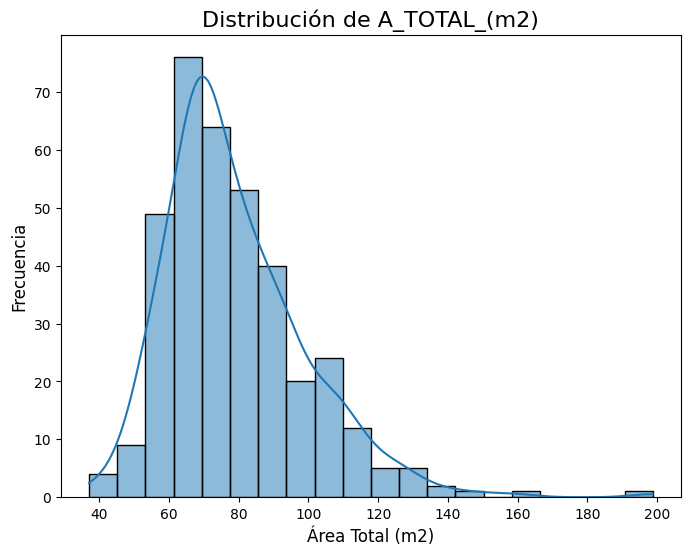

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el histograma
sns.histplot(data=df_analysis, x='A_TOTAL_(m2)', kde=True, bins=20)

# Añadir título y etiquetas
plt.title('Distribución de A_TOTAL_(m2)', fontsize=16)
plt.xlabel('Área Total (m2)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()


#### La mayoría de casas tienen 3 habitaciones, seguida de 2 (habitaciones), 4, 5, 1 y 6.

In [36]:
df_analysis.loc[:,"N_HABITACIONES"].value_counts()

N_HABITACIONES
3    170
2    107
4     73
5      8
1      6
6      2
Name: count, dtype: int64

#### La mayoría de casas tienen 2 baños, seguido de 1 y 3. No hay ninguna casa con 4 baños.

In [37]:
df_analysis.loc[:,"N_BAÑOS"].value_counts()

N_BAÑOS
2    222
1    133
3     11
Name: count, dtype: int64

#### La gran mayoría de casas no tienen Aseos.

In [38]:
df_analysis.loc[:,"N_ASEOS"].value_counts()

N_ASEOS
0    325
1     41
Name: count, dtype: int64

#### La mayoría de casas no tiene lavadero.

In [39]:
df_analysis.loc[:,"TIENE_LAVADERO"].value_counts()

TIENE_LAVADERO
False    265
True     101
Name: count, dtype: int64

#### La mayoría de casas tiene entrada.

In [40]:
df_analysis.loc[:,"TIENE_ENTRADA"].value_counts()

TIENE_ENTRADA
True     289
False     77
Name: count, dtype: int64

### **Relaciones entre variables X (predictoras)**

#### La mayoría de casas tienen 3 habitaciones y 2 baños. Seguido de 3 habitaciones y 1 baño. En tercero, lo mas común es que tengan 2 habitaciones y 2 baños o 4 habitaciones y 2 baños.
Si la casa tiene 1 o 2 habitaciones, generalmente hay un baño por habitación. Sin embargo, el incremento de número de habitaciones no necesariamente significa que aumenta el número de baños, número que se suele quedar en 2.

In [41]:
df_analysis.groupby("N_HABITACIONES")["N_BAÑOS"].value_counts()

N_HABITACIONES  N_BAÑOS
1               1            6
2               2           55
                1           52
3               2          103
                1           65
                3            2
4               2           55
                1           10
                3            8
5               2            8
6               2            1
                3            1
Name: count, dtype: int64

#### **Revisión de las distribuciones de los targets**
Se ve que en general tenemos distribuciones normales con sesgos en algunos casos, especialmente en el salón. Igualmente, vemos que mientras mas habitaciones tenga una casa, las últimas tendran una distribución mas amplia, en gran parte debido a los pocos datos que se tienen.

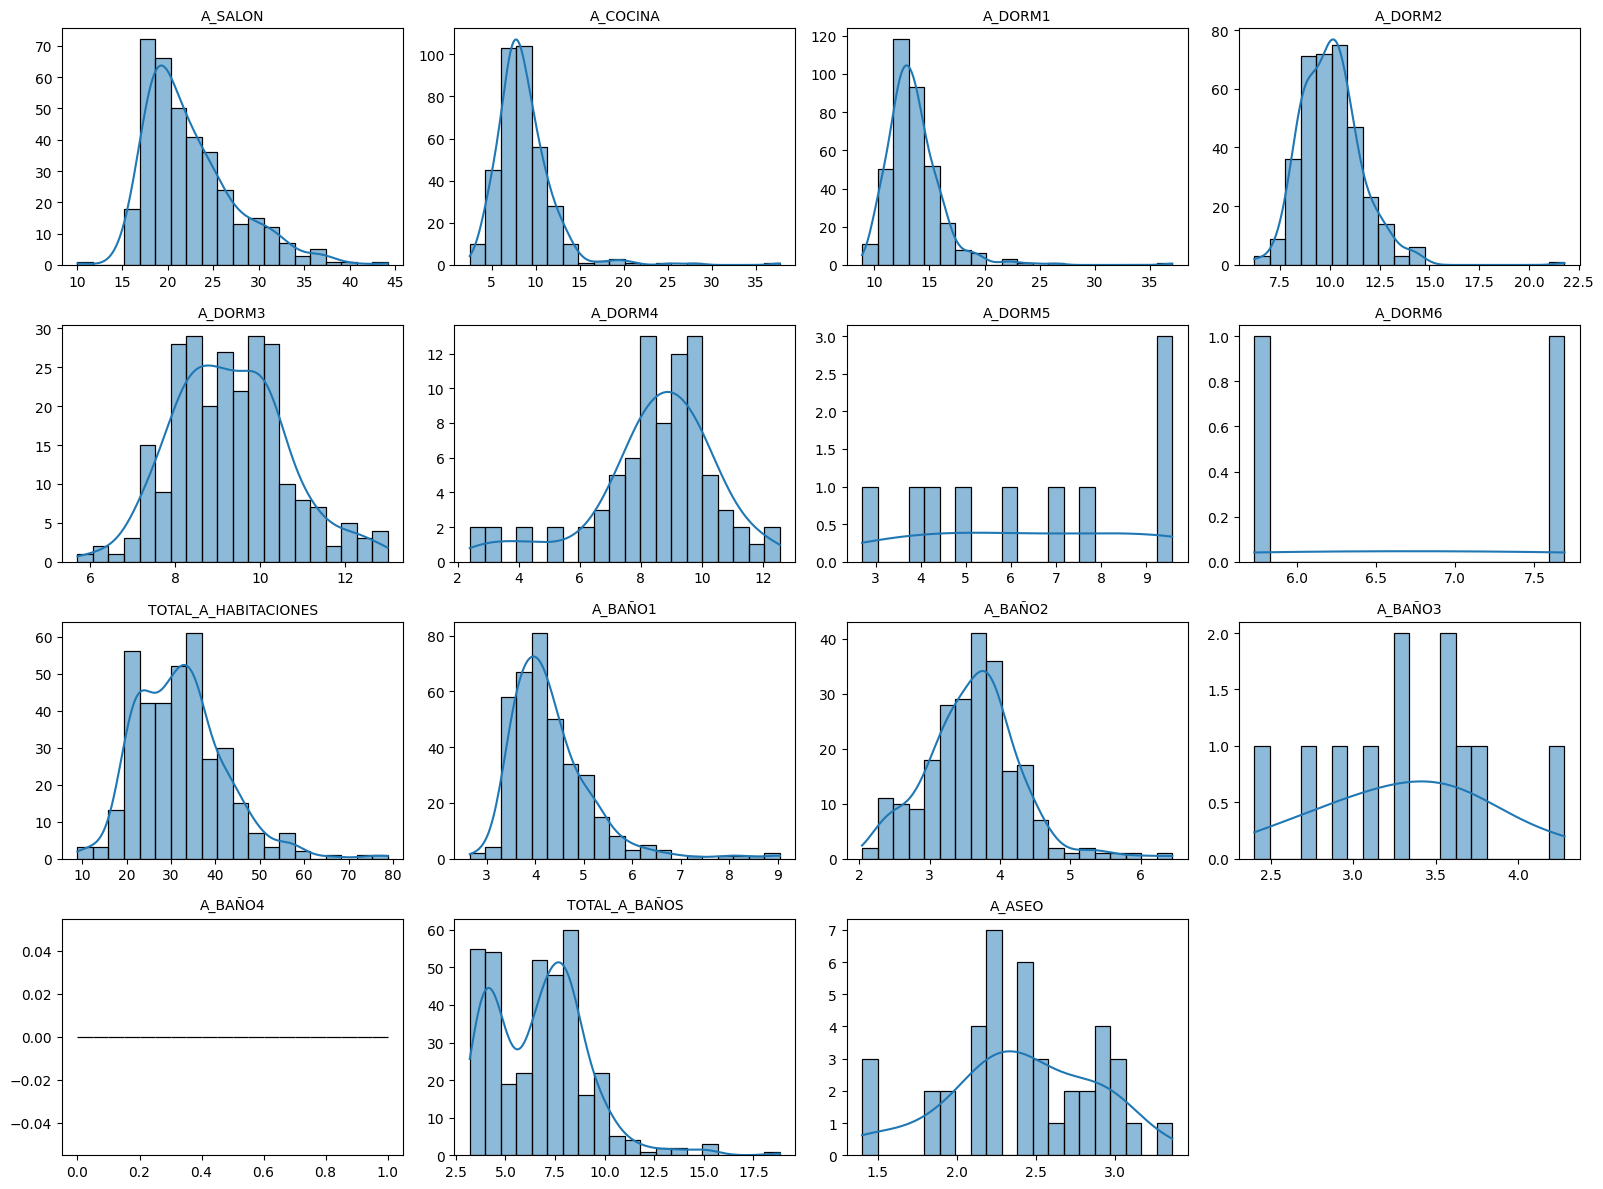

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista de columnas para las cuales queremos crear histogramas
columnas = [
    'A_SALON', 'A_COCINA', 'A_DORM1', 'A_DORM2', 'A_DORM3', 'A_DORM4',
    'A_DORM5', 'A_DORM6', 'TOTAL_A_HABITACIONES', 'A_BAÑO1', 'A_BAÑO2',
    'A_BAÑO3', 'A_BAÑO4', 'TOTAL_A_BAÑOS', 'A_ASEO'
]

# Crear una copia del DataFrame solo para los gráficos y reemplazar ceros con NaN
df_temp = df_analysis[columnas].replace(0, np.nan)

# Número de columnas y filas para los subplots
n_cols = 4
n_rows = (len(columnas) + n_cols - 1) // n_cols  # Calcular el número de filas

# Tamaño de la figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Crear histogramas en cada subplot
for i, columna in enumerate(columnas):
    sns.histplot(data=df_temp, x=columna, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(columna, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar gráficos sobrantes (en caso de que haya más subplots que columnas)
for j in range(len(columnas), len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño
plt.tight_layout()
plt.show()



#### Se procede a hacer un heatmap con las correlaciones para ver relaciones entre variables

In [43]:
df_analysis.columns

Index(['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS',
       'TIENE_LAVADERO', 'TIENE_ENTRADA', 'A_SALON', 'A_COCINA', 'A_DORM1',
       'A_DORM2', 'A_DORM3', 'A_DORM4', 'A_DORM5', 'A_DORM6',
       'TOTAL_A_HABITACIONES', 'A_BAÑO1', 'A_BAÑO2', 'A_BAÑO3', 'A_BAÑO4',
       'TOTAL_A_BAÑOS', 'A_ASEO', 'A_ENTRADA', 'A_PASILLO', 'A_LAVADERO'],
      dtype='object')

#### **Revisión de las correlaciones de las variables**
- El área total muestra una alta correlación con los targets. Especialmente con las áreas totales (Área Total de Habitaciones y Baños), lo cual es buena noticia ya que en la estrategia planteada inicialmente, se hará predicción de estas áreas totales.
- El número de habitaciones tiene una alta correlación con el área total de habitaciones, mayor que con las áreas de las habitaciones de forma individual.
- El número de baños tiene una alta correlación con el área total de baños, mayor que con las áreas de los baños de forma individual.
- Como podia esperarse del análisis previo de número de baños y habitaciones, la correlación entre el número de habitaciones y número de baños no es muy alta.
- Las variables de presencia de lavadero y de entrada no muestran una correlación alta con las variables target. 

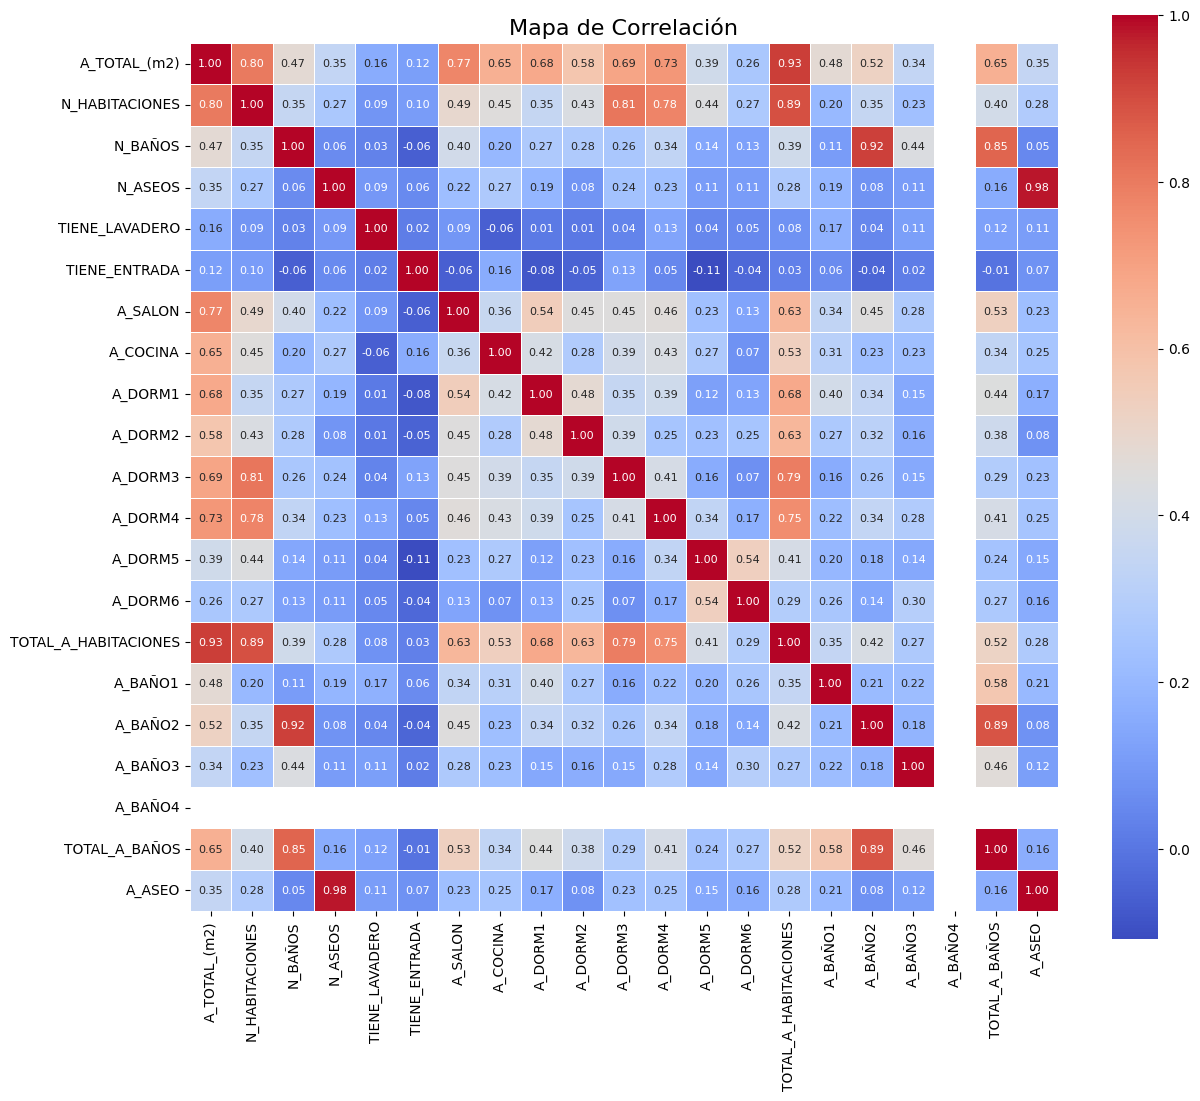

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas específicas
columnas_interes = [
    'A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS',
    'TIENE_LAVADERO', 'TIENE_ENTRADA', 'A_SALON', 'A_COCINA', 'A_DORM1',
    'A_DORM2', 'A_DORM3', 'A_DORM4', 'A_DORM5', 'A_DORM6',
    'TOTAL_A_HABITACIONES', 'A_BAÑO1', 'A_BAÑO2', 'A_BAÑO3', 'A_BAÑO4',
    'TOTAL_A_BAÑOS', 'A_ASEO'
]

# Calcular la matriz de correlación solo para las columnas seleccionadas
correlation_matrix = df_analysis[columnas_interes].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 12))

# Crear el heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5,
    annot_kws={"size": 8}
)

# Añadir título
plt.title("Mapa de Correlación", fontsize=16)

# Mostrar el gráfico
plt.show()


## **Sección 3: Modelo de Predicción del Área de los Dormitorios**

### **Revisión de proporciones promedio**

#### Primero se pretende revisar si las areas de las habitaciones suelen seguir patrones en sus proporciones respecto al total y respecto a la habitación principal.

In [45]:
df_analysis.loc[:,"PROP_DORM1"] = df_analysis.loc[:,"A_DORM1"] / df_analysis.loc[:,"TOTAL_A_HABITACIONES"]
df_analysis.loc[:,"PROP_DORM2"] = df_analysis.loc[:,"A_DORM2"] / df_analysis.loc[:,"TOTAL_A_HABITACIONES"]
df_analysis.loc[:,"PROP_DORM3"] = df_analysis.loc[:,"A_DORM3"] / df_analysis.loc[:,"TOTAL_A_HABITACIONES"]
df_analysis.loc[:,"PROP_DORM4"] = df_analysis.loc[:,"A_DORM4"] / df_analysis.loc[:,"TOTAL_A_HABITACIONES"]
df_analysis.loc[:,"PROP_DORM5"] = df_analysis.loc[:,"A_DORM5"] / df_analysis.loc[:,"TOTAL_A_HABITACIONES"]
df_analysis.loc[:,"PROP_DORM6"] = df_analysis.loc[:,"A_DORM6"] / df_analysis.loc[:,"TOTAL_A_HABITACIONES"]

#### **Revisión de la proporción del área de las habitaciones individuales respecto al área total de habitaciones.**
#### En general, la desviación estándar es relativamente baja, por lo que las proporciones suelen ser consistentes.

In [46]:
df_analysis.loc[df_analysis["N_HABITACIONES"] == 2,["PROP_DORM1","PROP_DORM2"]].describe()

,PROP_DORM1,PROP_DORM2
count,107.000000,107.000000
mean,0.569954,0.430046
std,0.029829,0.029829
min,0.511369,0.349794
25%,0.547200,0.408744
50%,0.568465,0.431535
75%,0.591256,0.452800
max,0.650206,0.488631


In [47]:
df_analysis.loc[df_analysis["N_HABITACIONES"] == 3,["PROP_DORM1","PROP_DORM2","PROP_DORM3"]].describe()

,PROP_DORM1,PROP_DORM2,PROP_DORM3
count,170.000000,170.000000,170.000000
mean,0.413922,0.308240,0.277839
std,0.028613,0.022288,0.022163
min,0.349735,0.256862,0.191083
25%,0.397212,0.292928,0.265256
50%,0.413743,0.304611,0.283199
75%,0.430442,0.318581,0.293052
max,0.508357,0.396245,0.319865


In [48]:
df_analysis.loc[df_analysis["N_HABITACIONES"] == 4,["PROP_DORM1","PROP_DORM2","PROP_DORM3","PROP_DORM4"]].describe()

,PROP_DORM1,PROP_DORM2,PROP_DORM3,PROP_DORM4
count,73.000000,73.000000,73.000000,73.000000
mean,0.342681,0.243045,0.223675,0.190600
std,0.038905,0.026424,0.019819,0.036512
min,0.280760,0.186667,0.160000,0.068235
25%,0.317508,0.226050,0.211053,0.184647
50%,0.338983,0.237911,0.222272,0.201830
75%,0.357451,0.258103,0.235825,0.211416
max,0.493333,0.312365,0.272941,0.235872


In [49]:
df_analysis.loc[df_analysis["N_HABITACIONES"] == 5,["PROP_DORM1","PROP_DORM2","PROP_DORM3","PROP_DORM4","PROP_DORM5"]].describe()

,PROP_DORM1,PROP_DORM2,PROP_DORM3,PROP_DORM4,PROP_DORM5
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.284466,0.216036,0.206346,0.179397,0.113756
std,0.051081,0.023843,0.019918,0.015200,0.041359
min,0.235056,0.175439,0.175439,0.162900,0.061785
25%,0.256879,0.196710,0.186695,0.171140,0.086234
50%,0.269134,0.225026,0.217253,0.176681,0.100776
75%,0.293597,0.229419,0.219814,0.181563,0.145851
max,0.401003,0.244827,0.226545,0.213247,0.170780


In [50]:
df_analysis.loc[df_analysis["N_HABITACIONES"] == 6,["PROP_DORM1","PROP_DORM2","PROP_DORM3","PROP_DORM4","PROP_DORM5","PROP_DORM6"]].describe()

,PROP_DORM1,PROP_DORM2,PROP_DORM3,PROP_DORM4,PROP_DORM5,PROP_DORM6
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.256578,0.238579,0.148285,0.145002,0.117020,0.094536
std,0.036103,0.053660,0.008342,0.011059,0.039504,0.030859
min,0.231049,0.200635,0.142386,0.137183,0.089086,0.072716
25%,0.243813,0.219607,0.145335,0.141093,0.103053,0.083626
50%,0.256578,0.238579,0.148285,0.145002,0.117020,0.094536
75%,0.269342,0.257551,0.151234,0.148912,0.130987,0.105446
max,0.282107,0.276523,0.154184,0.152822,0.144954,0.116356


#### Se guardan las proporciones respecto al total de ára de dormitorios para futuros cálculos.

In [51]:
prop_2_rooms = df_analysis.loc[df_analysis["N_HABITACIONES"] == 2,["PROP_DORM1","PROP_DORM2"]].describe().loc["mean"].values
prop_3_rooms = df_analysis.loc[df_analysis["N_HABITACIONES"] == 3,["PROP_DORM1","PROP_DORM2","PROP_DORM3"]].describe().loc["mean"].values
prop_4_rooms = df_analysis.loc[df_analysis["N_HABITACIONES"] == 4,["PROP_DORM1","PROP_DORM2","PROP_DORM3","PROP_DORM4"]].describe().loc["mean"].values
prop_5_rooms = df_analysis.loc[df_analysis["N_HABITACIONES"] == 5,["PROP_DORM1","PROP_DORM2","PROP_DORM3","PROP_DORM4","PROP_DORM5"]].describe().loc["mean"].values
prop_6_rooms = df_analysis.loc[df_analysis["N_HABITACIONES"] == 6,["PROP_DORM1","PROP_DORM2","PROP_DORM3","PROP_DORM4","PROP_DORM5","PROP_DORM6"]].describe().loc["mean"].values


#### **Revisión de la proporción del área de las habitaciones individuales respecto al área de la habitación principal.**
#### En general, la desviación estándar es relativamente mayor que cuando se calculan las proporciones respecto al total.

In [52]:
df_analysis.loc[:,"PROP_DORM2/DORM1"] = df_analysis.loc[:,"A_DORM2"] / df_analysis.loc[:,"A_DORM1"]
df_analysis.loc[:,"PROP_DORM3/DORM1"] = df_analysis.loc[:,"A_DORM3"] / df_analysis.loc[:,"A_DORM1"]
df_analysis.loc[:,"PROP_DORM4/DORM1"] = df_analysis.loc[:,"A_DORM4"] / df_analysis.loc[:,"A_DORM1"]
df_analysis.loc[:,"PROP_DORM5/DORM1"] = df_analysis.loc[:,"A_DORM5"] / df_analysis.loc[:,"A_DORM1"]
df_analysis.loc[:,"PROP_DORM6/DORM1"] = df_analysis.loc[:,"A_DORM6"] / df_analysis.loc[:,"A_DORM1"]

In [53]:
df_analysis.loc[df_analysis["N_HABITACIONES"] == 2,["PROP_DORM2/DORM1"]].describe()

,PROP_DORM2/DORM1
count,107.000000
mean,0.759265
std,0.091559
min,0.537975
25%,0.691315
50%,0.759124
75%,0.827486
max,0.955536


In [54]:
df_analysis.loc[df_analysis["N_HABITACIONES"] == 3,["PROP_DORM2/DORM1","PROP_DORM3/DORM1"]].describe()

,PROP_DORM2/DORM1,PROP_DORM3/DORM1
count,170.000000,170.000000
mean,0.750610,0.676752
std,0.096163,0.090364
min,0.515412,0.401985
25%,0.686924,0.621749
50%,0.735002,0.677254
75%,0.809565,0.736680
max,0.978930,0.909014


In [55]:
df_analysis.loc[df_analysis["N_HABITACIONES"] == 4,["PROP_DORM2/DORM1","PROP_DORM3/DORM1","PROP_DORM4/DORM1"]].describe()

,PROP_DORM2/DORM1,PROP_DORM3/DORM1,PROP_DORM4/DORM1
count,73.000000,73.000000,73.000000
mean,0.721518,0.663544,0.566773
std,0.129554,0.106813,0.137582
min,0.378378,0.324324,0.192053
25%,0.635802,0.605469,0.530303
50%,0.716667,0.663020,0.587196
75%,0.806723,0.733628,0.652778
max,0.998104,0.854331,0.806723


In [56]:
df_analysis.loc[df_analysis["N_HABITACIONES"] == 5,["PROP_DORM2/DORM1","PROP_DORM3/DORM1","PROP_DORM4/DORM1","PROP_DORM5/DORM1"]].describe()

,PROP_DORM2/DORM1,PROP_DORM3/DORM1,PROP_DORM4/DORM1,PROP_DORM5/DORM1
count,8.000000,8.000000,8.000000,8.000000
mean,0.783469,0.747102,0.648462,0.417917
std,0.166687,0.150944,0.128151,0.179938
min,0.437500,0.437500,0.421875,0.196875
25%,0.730897,0.693688,0.600629,0.299351
50%,0.788018,0.756146,0.656478,0.376228
75%,0.902961,0.849631,0.696287,0.597498
max,0.954239,0.932483,0.834705,0.634551


In [57]:
df_analysis.loc[df_analysis["N_HABITACIONES"] == 6,["PROP_DORM2/DORM1","PROP_DORM3/DORM1","PROP_DORM4/DORM1","PROP_DORM5/DORM1","PROP_DORM6/DORM1"]].describe()

,PROP_DORM2/DORM1,PROP_DORM3/DORM1,PROP_DORM4/DORM1,PROP_DORM5/DORM1,PROP_DORM6/DORM1
count,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.924288,0.586022,0.573854,0.471582,0.380681
std,0.079081,0.114974,0.123848,0.220323,0.173837
min,0.868369,0.504723,0.486280,0.315789,0.257760
25%,0.896329,0.545373,0.530067,0.393686,0.319220
50%,0.924288,0.586022,0.573854,0.471582,0.380681
75%,0.952248,0.626672,0.617641,0.549478,0.442141
max,0.980207,0.667322,0.661428,0.627374,0.503602


## **Feature Selection**

Se implementará la **Estrategia 1**, ya que muestra un mayor potencial debido a las fuertes correlaciones observadas entre las variables predictoras y las áreas totales de las habitaciones y los baños. Además, las proporciones de las habitaciones y baños en relación con el área total de habitaciones y baños resultan más consistentes, mostrando menor desviación estándar que las proporciones relativas a la habitación o baño principal. Esto sugiere que esta estrategia ofrece una base más sólida para la predicción.

### **Uso de Linear Regression para Feature Selection**
Para seleccionar las variables más relevantes, se utilizará un **Linear Regressor** como modelo base. Este enfoque permite identificar qué variables contribuyen significativamente al rendimiento del modelo, siguiendo los siguientes pasos:

1. **Inicio con variables clave:** Comenzaremos con una sola variable predictora y calcularemos el coeficiente de determinación (**R²**) utilizando validación cruzada. Esto ayudará a medir la capacidad explicativa inicial de esa variable.
   
2. **Incorporación progresiva de variables:** Una a una, se añadirán nuevas variables al conjunto de predictores. Si la inclusión de una variable mejora el valor de **R²**, se mantendrá en el modelo. En caso contrario, se descartará.

3. **Análisis de relevancia:** Este método asegura que únicamente se seleccionen las variables que realmente aportan valor predictivo, reduciendo el ruido y el sobreajuste.

El uso de **Linear Regressor** es ideal para este proceso debido a su naturaleza interpretativa y su rapidez computacional, lo que lo convierte en una herramienta eficiente para evaluar la relevancia individual y combinada de las variables. Una vez finalizado este proceso, se podrá considerar modelos más complejos para optimizar el rendimiento.


In [58]:
df_houses.columns

Index(['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS',
       'TIENE_LAVADERO', 'TIENE_ENTRADA', 'A_SALON', 'A_COCINA', 'A_DORM1',
       'A_DORM2', 'A_DORM3', 'A_DORM4', 'A_DORM5', 'A_DORM6',
       'TOTAL_A_HABITACIONES', 'A_BAÑO1', 'A_BAÑO2', 'A_BAÑO3', 'A_BAÑO4',
       'TOTAL_A_BAÑOS', 'A_ASEO', 'A_ENTRADA', 'A_PASILLO', 'A_LAVADERO'],
      dtype='object')

### **Predicción de Área Total de Dormitorios/Habitaciones**

#### **Prueba 1:** Se empieza prediciendo el área total de dormitorios utilizando una sola variable predictora. Empezamos por el área total en metros cuadrados (**"A_TOTAL_(m2)"**), la cual es la variable que muestra mayor potencial de predicción

In [59]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.8383
MSE (promedio CV): 13.6576
RMSE (promedio CV): 3.6956
MAE (promedio CV): 2.8515


#### **Prueba 2:** Se añade número de habitaciones. Mejora el resultado, por lo que se mantiene.

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.9125
MSE (promedio CV): 7.0752
RMSE (promedio CV): 2.6599
MAE (promedio CV): 2.0204


#### **Prueba 3:** Se añade número de baños. Mejora ligeramente el resultado, por lo que se mantiene.

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.9130
MSE (promedio CV): 7.0558
RMSE (promedio CV): 2.6563
MAE (promedio CV): 2.0194


In [62]:
df_houses.columns

Index(['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS',
       'TIENE_LAVADERO', 'TIENE_ENTRADA', 'A_SALON', 'A_COCINA', 'A_DORM1',
       'A_DORM2', 'A_DORM3', 'A_DORM4', 'A_DORM5', 'A_DORM6',
       'TOTAL_A_HABITACIONES', 'A_BAÑO1', 'A_BAÑO2', 'A_BAÑO3', 'A_BAÑO4',
       'TOTAL_A_BAÑOS', 'A_ASEO', 'A_ENTRADA', 'A_PASILLO', 'A_LAVADERO'],
      dtype='object')

#### **Prueba 4:** Se añade número de aseos. Mejora ligeramente el resultado, por lo que se mantiene.

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','N_ASEOS']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.9155
MSE (promedio CV): 6.9166
RMSE (promedio CV): 2.6299
MAE (promedio CV): 1.9770


#### **Prueba 5:** Se añade si tiene lavadero o no. Mejora ligeramente el resultado, por lo que se mantiene.

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','N_ASEOS','TIENE_LAVADERO']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.9180
MSE (promedio CV): 6.7288
RMSE (promedio CV): 2.5940
MAE (promedio CV): 1.9793


#### **Prueba 6:** Se añade si tiene entrada o no. Mejora ligeramente el resultado, por lo que se mantiene.

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','N_ASEOS','TIENE_LAVADERO','TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.9246
MSE (promedio CV): 6.2110
RMSE (promedio CV): 2.4922
MAE (promedio CV): 1.9000


### **Conclusión**

Para el modelo de predicción del área total de dormitorios, se decidió incluir las seis variables predictoras. Esta decisión se basa en que los mejores resultados se obtienen cuando se consideran todas las variables disponibles, lo que mejora significativamente la capacidad del modelo para capturar las relaciones entre las características y la variable objetivo.

### **Rendimiento del Modelo de Regresión Lineal**

El modelo de regresión lineal, que inicialmente se utilizó como herramienta para realizar **Feature Selection**, ha demostrado ser sorprendentemente efectivo en términos de rendimiento general. Durante la evaluación mediante **Cross-Validation**, alcanzó un impresionante **R² promedio de 0.9246**, lo que refleja una excelente capacidad para explicar la variabilidad de los datos. Además, logró un **MAE promedio de 1.9 (MAPE de 6%)**, lo que representa un error promedio de casi **2 metros cuadrados**, una precisión notable para este contexto.

Este rendimiento sobresaliente puede atribuirse a la **fuerte correlación lineal entre las variables predictoras y la variable objetivo**. Variables como el área total de la casa, el número de habitaciones y baños y la presencia de un lavadero o de una entrada tienen relaciones aparentemente **lineales** con la variable objetivo (Área total de dormitorios). Esto permite al modelo de regresión lineal capturar con precisión estas relaciones sin necesidad de mayor complejidad. Este resultado destaca que, cuando las variables están bien correlacionadas, los modelos lineales pueden ser altamente competitivos, incluso frente a algoritmos más avanzados como Random Forest o Gradient Boosting, los cuales se procederan a evaluar a continuación.

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','N_ASEOS','TIENE_LAVADERO','TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Para MAPE se necesita predecir en cada fold manualmente
y_train_pred_cv = cross_val_predict(linear_model, X_train_scaled, y_train, cv=cv)
mape_cv = mean_absolute_percentage_error(y_train, y_train_pred_cv) * 100  # En porcentaje

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")
print(f"MAPE (promedio CV): {mape_cv:.2f}%")


=== Métricas de Cross-Validation ===
R² (promedio CV): 0.9246
MSE (promedio CV): 6.2110
RMSE (promedio CV): 2.4922
MAE (promedio CV): 1.9000
MAPE (promedio CV): 6.06%


## **Exploración de otros modelos**

#### **Random Forest**

In [629]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos (no es estrictamente necesario para Random Forest, pero lo dejamos por consistencia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo Random Forest
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Definimos la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [150, 200, 250],            # Número de árboles
    'max_depth': [5, 7, 10, 12],            # Profundidad máxima de los árboles
    'min_samples_split': [2, 3, 5],           # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 3],             # Mínimo de muestras por hoja
    'max_features': ['sqrt', 'log2', None],    # Número de variables consideradas en cada división
    'bootstrap': [True]                 # Uso de bootstrap
}

# Configuración del GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # Número de folds en Cross-Validation
    scoring='neg_mean_squared_error',  # Métrica de evaluación
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1   # Mostrar progreso
)

# Realizar GridSearchCV
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Imprimir los mejores parámetros y el mejor puntaje
print("=== Mejor configuración de hiperparámetros ===")
print(grid_search.best_params_)
print(f"Mejor puntaje (neg MSE): {-grid_search.best_score_:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
=== Mejor configuración de hiperparámetros ===
{'bootstrap': True, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Mejor puntaje (neg MSE): 8.0930


In [630]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos (no es estrictamente necesario para Random Forest, pero lo dejamos por consistencia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo Random Forest con nuevos hiperparámetros
rf_model = RandomForestRegressor(
    n_estimators=200,       # Aumentamos el número de árboles para mayor robustez
    max_depth=7,            # Limitamos la profundidad para evitar nodos demasiado específicos
    min_samples_split=3,    # Requiere más muestras para dividir un nodo
    min_samples_leaf=1,     # Requiere más muestras por hoja para reducir el sobreajuste
    max_features=None,    # Usa una raíz cuadrada del total de variables en cada división
    bootstrap=True,         # Uso de bootstrap para aleatoriedad adicional
    random_state=42,        # Semilla para reproducibilidad
    n_jobs=-1               # Usa todos los núcleos disponibles
)

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(rf_model, X_train_scaled, y_train.values.ravel(), cv=cv, scoring='r2')
mse_scores = -cross_val_score(rf_model, X_train_scaled, y_train.values.ravel(), cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(rf_model, X_train_scaled, y_train.values.ravel(), cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation (Random Forest con nuevos hiperparámetros) ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")



=== Métricas de Cross-Validation (Random Forest con nuevos hiperparámetros) ===
R² (promedio CV): 0.9069
MSE (promedio CV): 8.0930
RMSE (promedio CV): 2.8448
MAE (promedio CV): 1.9735


### **AdaBoost**

In [631]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos (AdaBoost no lo requiere, pero se mantiene por consistencia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo AdaBoost
adaboost_model = AdaBoostRegressor(random_state=42)

# Definimos la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],      # Número de estimadores (árboles base)
    'learning_rate': [0.01, 0.1, 0.5, 1],  # Tasa de aprendizaje
    'loss': ['linear', 'square', 'exponential']  # Función de pérdida
}

# Configuración del GridSearchCV con Cross-Validation
grid_search = GridSearchCV(
    estimator=adaboost_model,
    param_grid=param_grid,
    cv=5,  # Número de folds en Cross-Validation
    scoring='neg_mean_squared_error',  # Métrica de evaluación (neg MSE)
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1   # Mostrar progreso
)

# Realizar GridSearchCV
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Imprimir los mejores parámetros y el mejor puntaje
print("=== Mejor configuración de hiperparámetros (AdaBoost) ===")
print(grid_search.best_params_)
print(f"Mejor puntaje (neg MSE en CV): {-grid_search.best_score_:.4f}")

# Evaluar el modelo con los mejores parámetros en Cross-Validation
best_adaboost_model = grid_search.best_estimator_
cv_r2_scores = cross_val_score(best_adaboost_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='r2')
cv_mse_scores = -cross_val_score(best_adaboost_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
cv_mae_scores = -cross_val_score(best_adaboost_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_absolute_error')

# Promedios de métricas en Cross-Validation
mean_r2_cv = np.mean(cv_r2_scores)
mean_mse_cv = np.mean(cv_mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(cv_mae_scores)

# Imprimir métricas de Cross-Validation
print("\n=== Métricas de Cross-Validation con el mejor modelo (AdaBoost) ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
=== Mejor configuración de hiperparámetros (AdaBoost) ===
{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 50}
Mejor puntaje (neg MSE en CV): 10.4010

=== Métricas de Cross-Validation con el mejor modelo (AdaBoost) ===
R² (promedio CV): 0.8769
MSE (promedio CV): 10.4010
RMSE (promedio CV): 3.2251
MAE (promedio CV): 2.2881


#### **GradientBoosting**

In [637]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos (Gradient Boosting no lo requiere, pero se mantiene por consistencia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Definimos la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],       # Número de estimadores (árboles base)
    'learning_rate': [0.01, 0.1, 0.2, 0.5],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7],              # Profundidad máxima de los árboles
    'min_samples_split': [2, 3, 5],      # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],       # Mínimo de muestras por hoja
    'subsample': [0.8, 1.0]              # Fracción de muestras usadas para entrenar cada árbol
}

# Configuración del GridSearchCV con Cross-Validation
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,  # Número de folds en Cross-Validation
    scoring='neg_mean_squared_error',  # Métrica de evaluación (neg MSE)
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1   # Mostrar progreso
)

# Realizar GridSearchCV
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Imprimir los mejores parámetros y el mejor puntaje
print("=== Mejor configuración de hiperparámetros (Gradient Boosting) ===")
print(grid_search.best_params_)
print(f"Mejor puntaje (neg MSE en CV): {-grid_search.best_score_:.4f}")

# Evaluar el modelo con los mejores parámetros en Cross-Validation
best_gb_model = grid_search.best_estimator_
cv_r2_scores = cross_val_score(best_gb_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='r2')
cv_mse_scores = -cross_val_score(best_gb_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
cv_mae_scores = -cross_val_score(best_gb_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_absolute_error')

# Promedios de métricas en Cross-Validation
mean_r2_cv = np.mean(cv_r2_scores)
mean_mse_cv = np.mean(cv_mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(cv_mae_scores)

# Imprimir métricas de Cross-Validation
print("\n=== Métricas de Cross-Validation con el mejor modelo (Gradient Boosting) ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\Usuario\miniconda3\envs\ml_env\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


=== Mejor configuración de hiperparámetros (Gradient Boosting) ===
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 0.8}
Mejor puntaje (neg MSE en CV): 7.8375

=== Métricas de Cross-Validation con el mejor modelo (Gradient Boosting) ===
R² (promedio CV): 0.9093
MSE (promedio CV): 7.8375
RMSE (promedio CV): 2.7995
MAE (promedio CV): 1.9490


#### **XGBoost**

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos (XGBoost no requiere escalamiento, pero se mantiene por consistencia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo XGBoost
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)

# Definimos la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],       # Número de estimadores (árboles base)
    'learning_rate': [0.01, 0.1, 0.2, 0.5],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7],              # Profundidad máxima de los árboles
    'subsample': [0.8, 1.0],             # Fracción de muestras usadas para entrenar cada árbol
    'colsample_bytree': [0.8, 1.0],      # Fracción de características usadas por cada árbol
    'min_child_weight': [1, 3, 5],       # Peso mínimo de las hojas para evitar sobreajuste
}

# Configuración del GridSearchCV con Cross-Validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,  # Número de folds en Cross-Validation
    scoring='neg_mean_squared_error',  # Métrica de evaluación (neg MSE)
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1   # Mostrar progreso
)

# Realizar GridSearchCV
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Imprimir los mejores parámetros y el mejor puntaje
print("=== Mejor configuración de hiperparámetros (XGBoost) ===")
print(grid_search.best_params_)
print(f"Mejor puntaje (neg MSE en CV): {-grid_search.best_score_:.4f}")

# Evaluar el modelo con los mejores parámetros en Cross-Validation
best_xgb_model = grid_search.best_estimator_
cv_r2_scores = cross_val_score(best_xgb_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='r2')
cv_mse_scores = -cross_val_score(best_xgb_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
cv_mae_scores = -cross_val_score(best_xgb_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_absolute_error')

# Promedios de métricas en Cross-Validation
mean_r2_cv = np.mean(cv_r2_scores)
mean_mse_cv = np.mean(cv_mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(cv_mae_scores)

# Imprimir métricas de Cross-Validation
print("\n=== Métricas de Cross-Validation con el mejor modelo (XGBoost) ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


c:\Users\Usuario\miniconda3\envs\ml_env\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


=== Mejor configuración de hiperparámetros (XGBoost) ===
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Mejor puntaje (neg MSE en CV): 7.7077

=== Métricas de Cross-Validation con el mejor modelo (XGBoost) ===
R² (promedio CV): 0.9096
MSE (promedio CV): 7.7077
RMSE (promedio CV): 2.7763
MAE (promedio CV): 1.9383


### **Conclusión Final**

Tras haber evaluado diversos modelos, incluyendo LinearRegression, Random Forest, Gradient Boosting, AdaBoost, y XGBoost, se concluye que el modelo que muestra los **mejores resultados** es el **Regresor Lineal**. Esto resulta particularmente interesante dado que, en muchos escenarios, modelos más complejos suelen superar a los lineales en términos de rendimiento.

### **Rendimiento del Regresor Lineal**
- **R² promedio en Cross-Validation:** 0.9246
- **Error Absoluto Medio (MAE):** ~1.9 (equivalente a un error promedio de casi 2 m²)

Estos resultados sugieren que el modelo lineal es capaz de capturar las relaciones en los datos de manera efectiva, sin necesidad de complejidad adicional.

### **¿Por qué el Regresor Lineal funciona tan bien?**
1. **Fuerte correlación lineal:**
   - Las variables predictoras, como el número de habitaciones, baños, aseos, y el área total de la casa, tienen relaciones lineales claras con el área total destinada a dormitorios.
   - Estas relaciones permiten que un modelo lineal explique la mayor parte de la variabilidad sin necesidad de capturar interacciones más complejas.

2. **Datos bien distribuidos:**
   - La naturaleza del conjunto de datos parece ajustarse bien a un modelo lineal. Esto indica que las relaciones no son significativamente no lineales, lo que hace que el uso de modelos complejos sea menos beneficioso.

3. **Menor riesgo de sobreajuste:**
   - Comparado con modelos como Random Forest o XGBoost, el regresor lineal tiene menos hiperparámetros y no depende de decisiones como el número de árboles o la profundidad. Esto reduce la posibilidad de sobreajuste en un dataset relativamente pequeño como este.

4. **Dataset limitado:** 
   - Random Forest necesita más datos para aprovechar al máximo su capacidad de modelar relaciones complejas. Con un dataset más pequeño, podría no generalizar tan bien.

### **Implicaciones de este hallazgo**
1. **Simplicidad:**
   - Un modelo lineal es más fácil de interpretar y explicar, lo que puede ser ventajoso para comunicar resultados a audiencias no técnicas.

2. **Velocidad:**
   - Los modelos lineales son más rápidos de entrenar y ejecutar, especialmente en escenarios donde el tiempo de cómputo es crítico.

3. **Generalización:**
   - El buen rendimiento del regresor lineal sugiere que el modelo probablemente generalizará bien a nuevos datos, ya que no está atrapado en patrones específicos del conjunto de entrenamiento.

En resumen, este hallazgo subraya que la simplicidad no siempre debe subestimarse en machine learning. Cuando los datos tienen una estructura lineal clara, un modelo lineal puede ofrecer resultados altamente competitivos, a la par de modelos más sofisticados. 🚀



### **Optimización de Modelo**

#### **Linear Regression Base**

In [419]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Prueba del modelo en el conjunto de test
linear_model.fit(X_train_scaled, y_train)  # Entrenar el modelo con los datos de entrenamiento
y_test_pred = linear_model.predict(X_test_scaled)  # Predicción en test

# Cálculo de métricas en el conjunto de test
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n=== Métricas en el conjunto de Test ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")


=== Métricas de Cross-Validation ===
R² (promedio CV): 0.9246
MSE (promedio CV): 6.2110
RMSE (promedio CV): 2.4922
MAE (promedio CV): 1.9000

=== Métricas en el conjunto de Test ===
R² (Test): 0.9487
MSE (Test): 7.5789
RMSE (Test): 2.7530
MAE (Test): 1.8527
MAPE (Test): 5.69%


#### **Prueba de Ridge y Lasso**
Se utiliza GridSearch encontrar los hiperparamétros óptimos para determinar que modelo utilizar y con que parámetros.

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración del pipeline para polinomios y regularización
pipeline = Pipeline([
    ('scaler', StandardScaler()),                     # Escalamiento
    ('poly_features', PolynomialFeatures()),          # Polinomios de varios grados
    ('model', Ridge())                                # Modelo base (se reemplaza en GridSearch)
])

# Definir la cuadrícula de hiperparámetros
param_grid = [
    {
        'poly_features__degree': [1, 2, 3],           # Grados de polinomios a probar
        'model': [Ridge()],                           # Modelo Ridge
        'model__alpha': [0.1, 1.0, 10.0],             # Regularización L2
    },
    {
        'poly_features__degree': [1, 2, 3],           # Grados de polinomios a probar
        'model': [Lasso()],                           # Modelo Lasso
        'model__alpha': [0.01, 0.1, 1.0],             # Regularización L1
        'model__max_iter': [1000]                     # Iteraciones máximas
    }
]

# Configuración del GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # Número de folds en Cross-Validation
    scoring='neg_mean_squared_error',  # Métrica de evaluación (neg MSE)
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1   # Mostrar progreso
)

# Ejecutar GridSearch
grid_search.fit(X_train, y_train.values.ravel())

# Imprimir los mejores parámetros y el mejor puntaje
print("=== Mejor configuración de hiperparámetros ===")
print(grid_search.best_params_)
print(f"Mejor puntaje (neg MSE en CV): {-grid_search.best_score_:.4f}")

# Usar el mejor modelo para evaluar con Cross-Validation
best_model = grid_search.best_estimator_
cv_r2_scores = cross_val_score(best_model, X_train, y_train.values.ravel(), cv=5, scoring='r2')
cv_mse_scores = -cross_val_score(best_model, X_train, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
cv_mae_scores = -cross_val_score(best_model, X_train, y_train.values.ravel(), cv=5, scoring='neg_mean_absolute_error')

# Promedios de métricas en Cross-Validation
mean_r2_cv = np.mean(cv_r2_scores)
mean_mse_cv = np.mean(cv_mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(cv_mae_scores)

# Imprimir métricas de Cross-Validation
print("\n=== Métricas de Cross-Validation con el mejor modelo ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
=== Mejor configuración de hiperparámetros ===
{'model': Ridge(), 'model__alpha': 1.0, 'poly_features__degree': 1}
Mejor puntaje (neg MSE en CV): 6.2069

=== Métricas de Cross-Validation con el mejor modelo ===
R² (promedio CV): 0.9245
MSE (promedio CV): 6.2069
RMSE (promedio CV): 2.4914
MAE (promedio CV): 1.9005


#### **Ridge**
#### Se procede a probar el modelo Ridge con las condiciones encontradas por GridSearch.

In [282]:
# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo Ridge
ridge_model = Ridge(alpha=1.0)

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(ridge_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(ridge_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Prueba del modelo en el conjunto de test
ridge_model.fit(X_train_scaled, y_train)  # Entrenar el modelo con los datos de entrenamiento
y_test_pred = ridge_model.predict(X_test_scaled)  # Predicción en test

# Cálculo de métricas en el conjunto de test
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n=== Métricas en el conjunto de Test ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.9246
MSE (promedio CV): 6.2033
RMSE (promedio CV): 2.4906
MAE (promedio CV): 1.9004

=== Métricas en el conjunto de Test ===
R² (Test): 0.9483
MSE (Test): 7.6294
RMSE (Test): 2.7621
MAE (Test): 1.8540
MAPE (Test): 5.71%


#### **Linear Regression vs Ridge**
Aparentemente, en este caso no se necesita regularización ya que los resultados del Linear Regression son ligeramente mejores y los coeficientes de ambos modelos son muy similares.

In [70]:
linear_model.coef_

array([[ 6.22475681,  3.77253032, -0.57704563, -0.4757659 , -0.51326105,
        -0.79328959]])

In [71]:
ridge_model.coef_

array([[ 6.18433587,  3.7815492 , -0.5605868 , -0.46443752, -0.50752865,
        -0.78691407]])

### **Conclusión: Selección del Modelo Optimizado**

Tras evaluar múltiples modelos y técnicas de optimización, se ha decidido utilizar el modelo de **Regresión Lineal simple** como modelo final para la predicción del área total de dormitorios. Esta decisión se fundamenta en los siguientes puntos:

1. **Resultados sobresalientes:**
   - El modelo de Regresión Lineal simple mostró un desempeño excelente en términos de métricas clave como el **R² promedio de 0.9246** y un **MAE promedio de 1.9 m²** en cross-validation. Estos resultados superan ligeramente los obtenidos con Ridge, lo que sugiere que el modelo lineal básico ya captura adecuadamente las relaciones entre las variables.

2. **Coeficientes consistentes:**
   - Los coeficientes obtenidos con el modelo lineal y Ridge son casi idénticos, lo que indica que no existe un problema significativo de sobreajuste o multicolinealidad en los datos actuales. Esto refuerza la idea de que la regularización L2 no aporta un beneficio tangible en este caso específico.

3. **Relaciones lineales claras:**
   - Las relaciones entre las variables predictoras y la variable objetivo son fuertemente lineales y están bien modeladas por la Regresión Lineal básica. Esto elimina la necesidad de utilizar un modelo más complejo como Ridge en este momento.

4. **Preparación para la expansión del dataset:**
   - Aunque el equipo ha indicado que el dataset será ampliado en el futuro, el modelo lineal simple ofrece un rendimiento sólido y es fácilmente interpretable. Si se detectan problemas de sobreajuste con los nuevos datos, podría reevaluarse la opción de implementar Ridge.

5. **Simplicidad y eficiencia:**
   - El modelo lineal básico es más eficiente computacionalmente y más fácil de interpretar, lo que lo convierte en una elección práctica, especialmente en un proyecto donde la claridad de los resultados es clave.

En resumen, **Regresión Lineal simple** ofrece una combinación ideal de precisión, simplicidad y robustez para el dataset actual. Aunque Ridge sigue siendo una opción viable para futuros escenarios con datos más complejos, los resultados actuales justifican plenamente el uso del modelo lineal básico para este proyecto.

### **Relevancia de Variables**
Las variables tienen el siguiente orden de relevancia:
1. Área Total Utilizable en m2
2. Número de Habitaciones
3. Presencia de Entrada
4. Número de Baños
5. Presencia de Lavadero
6. Número de Aseos

In [421]:
X_train.columns

Index(['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS',
       'TIENE_LAVADERO', 'TIENE_ENTRADA'],
      dtype='object')

In [420]:
linear_model.coef_

array([[ 6.22475681,  3.77253032, -0.57704563, -0.4757659 , -0.51326105,
        -0.79328959]])

### **Cálculo de habitaciones individuales**
Se procede a utilizar las proporciones promedio calculadas para obtener el tamaño aproximado de cada habitación.

#### Se crea el modelo y se entrena

In [394]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES','A_DORM1','A_DORM2', 'A_DORM3', 'A_DORM4', 'A_DORM5', 'A_DORM6']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_1_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Se define la y de entrenamiento

y_train_to_fit = y_train["TOTAL_A_HABITACIONES"]

# Entrenamiento del Modelo
linear_model.fit(X=X_train_scaled,y=y_train_to_fit)

# Hacer las predicciones del total del área
pred_total = linear_model.predict(X_test_1_scaled)


### **Evaluación de Métricas en la Predicción de tamaños de Habitaciones Individuales**

 #### Se procede a crear un dataframe con los datos reales del conjunto de Test y las predicciones.

In [396]:
pred_total_series = pd.Series(np.round(pred_total,2))
pred_total_series

0     31.17
1     20.17
2     21.00
3     43.64
4     23.16
      ...  
69    23.08
70    22.24
71    31.09
72    42.57
73    32.99
Length: 74, dtype: float64

In [ ]:
df_test = pd.concat([X_test["N_HABITACIONES"],y_test],axis=1,ignore_index=False).reset_index(drop=True)
df_test = pd.concat([df_test,pred_total_series],axis=1)
df_test = df_test.rename(columns={0:"PRED_A_HABITACIONES"})
df_test

,N_HABITACIONES,TOTAL_A_HABITACIONES,A_DORM1,A_DORM2,A_DORM3,A_DORM4,A_DORM5,A_DORM6,PRED_A_HABITACIONES
0,3,32.04,13.80,9.48,8.76,0.00,0.0,0.0,31.17
1,2,18.28,10.07,8.21,0.00,0.00,0.0,0.0,20.17
2,2,20.52,11.83,8.69,0.00,0.00,0.0,0.0,21.00
3,4,42.54,15.95,12.16,11.02,3.41,0.0,0.0,43.64
4,2,23.87,12.83,11.04,0.00,0.00,0.0,0.0,23.16
...,...,...,...,...,...,...,...,...,...
69,2,21.34,12.23,9.11,0.00,0.00,0.0,0.0,23.08
70,2,22.80,13.77,9.03,0.00,0.00,0.0,0.0,22.24
71,3,33.48,13.94,9.91,9.63,0.00,0.0,0.0,31.09
72,4,33.53,11.82,10.05,8.58,3.08,0.0,0.0,42.57


#### Se procede a crear las columnas de predicciones para cada habitación.

In [398]:
# Casas de 1 Habitación
n_rooms = 1
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM1"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"]

# Casas de 2 Habitaciones
n_rooms = 2
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM1"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_2_rooms[0]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM2"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_2_rooms[1]

# Casas de 3 Habitaciones
n_rooms = 3
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM1"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_3_rooms[0]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM2"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_3_rooms[1]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM3"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_3_rooms[2]

# Casas de 4 Habitaciones
n_rooms = 4
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM1"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_4_rooms[0]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM2"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_4_rooms[1]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM3"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_4_rooms[2]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM4"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_4_rooms[3]

# Casas de 5 Habitaciones
n_rooms = 5
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM1"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_5_rooms[0]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM2"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_5_rooms[1]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM3"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_5_rooms[2]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM4"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_5_rooms[3]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM5"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_5_rooms[4]

# Casas de 5 Habitaciones
n_rooms = 6
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM1"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_6_rooms[0]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM2"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_6_rooms[1]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM3"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_6_rooms[2]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM4"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_6_rooms[3]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM5"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_6_rooms[4]
df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_DORM6"] = df_test.loc[df_test["N_HABITACIONES"] == n_rooms,"PRED_A_HABITACIONES"] * prop_6_rooms[5]

In [385]:
df_test.loc[df_test["N_HABITACIONES"] == 4]

,N_HABITACIONES,TOTAL_A_HABITACIONES,A_DORM1,A_DORM2,A_DORM3,A_DORM4,A_DORM5,A_DORM6,PRED_A_HABITACIONES,PRED_A_DORM1,PRED_A_DORM2,PRED_A_DORM3,PRED_A_DORM4,PRED_A_DORM5,PRED_A_DORM6
3,4,42.54,15.95,12.16,11.02,3.41,0.0,0.0,43.64,14.954590,10.606477,9.761166,8.317767,NaN,NaN
10,4,46.10,15.55,11.25,10.25,9.05,0.0,0.0,46.94,16.085437,11.408525,10.499293,8.946746,NaN,NaN
18,4,55.58,24.33,11.21,10.03,10.01,0.0,0.0,49.05,16.808493,11.921350,10.971246,9.348911,NaN,NaN
24,4,42.21,13.26,10.97,9.97,8.01,0.0,0.0,39.65,13.587294,9.636728,8.868704,7.557274,NaN,NaN
28,4,55.00,22.80,11.10,10.70,10.40,0.0,0.0,47.77,16.369862,11.610253,10.684943,9.104943,NaN,NaN
33,4,49.40,18.70,10.50,10.20,10.00,0.0,0.0,50.02,17.140893,12.157104,11.188211,9.533792,NaN,NaN
38,4,46.60,16.20,10.30,10.30,9.80,0.0,0.0,47.27,16.198521,11.488730,10.573105,9.009643,NaN,NaN
39,4,42.79,13.70,9.75,9.75,9.59,0.0,0.0,44.57,15.273283,10.832509,9.969183,8.495024,NaN,NaN
41,4,48.56,14.88,12.48,12.12,9.08,0.0,0.0,47.20,16.174534,11.471717,10.557448,8.996301,NaN,NaN
45,4,35.40,12.00,8.60,7.44,7.36,0.0,0.0,38.91,13.333710,9.456875,8.703184,7.416231,NaN,NaN


In [406]:
X_test.iloc[[51]]

,A_TOTAL_(m2),N_HABITACIONES,N_BAÑOS,N_ASEOS,TIENE_LAVADERO,TIENE_ENTRADA
344,114.0,4,2,0,False,True


In [407]:
df_test.iloc[[51]]


,N_HABITACIONES,TOTAL_A_HABITACIONES,A_DORM1,A_DORM2,A_DORM3,A_DORM4,A_DORM5,A_DORM6,PRED_A_HABITACIONES,PRED_A_DORM1,PRED_A_DORM2,PRED_A_DORM3,PRED_A_DORM4,PRED_A_DORM5,PRED_A_DORM6
51,4,47.1,16.85,10.65,10.4,9.2,0.0,0.0,48.07,16.472666,11.683166,10.752045,9.162123,NaN,NaN


### **Métricas de evaluación para las predicciones de la Habitación 1**

#### Los resultados son satisfactorios. En promedio nos equivocamos por poco mas de un metro (8.79%).

In [357]:
y_test_h = df_test.loc[:,"A_DORM1"]
y_test_pred_h = df_test.loc[:,"PRED_A_DORM1"]


r2_test = r2_score(y_test_h, y_test_pred_h)
mse_test = mean_squared_error(y_test_h, y_test_pred_h)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test_h, y_test_pred_h)
mape_test = mean_absolute_percentage_error(y_test_h, y_test_pred_h) * 100

print("\n=== Métricas en el conjunto de Test para la Habitación 1 ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

mae_bedroom_1 = mae_test

# Guardar el valor en un archivo JSON
metrics = {"mae_bedroom_1": mae_bedroom_1}
with open("./data/room_metrics.json", "w") as json_file:
    json.dump(metrics, json_file, indent=4)


=== Métricas en el conjunto de Test para la Habitación 1 ===
R² (Test): 0.5384
MSE (Test): 3.5030
RMSE (Test): 1.8716
MAE (Test): 1.2837
MAPE (Test): 8.79%


### **Validación respecto a predecir directamente el tamaño de la habitación 1**
#### Vemos que los resultados son muy parecidos a si predijeramos directamente el tamaño de la Habitación 1, siendo esta última opción, ligeramente mejor en resultados. En este momento podria plantearse hacer un modelo para cada habitación, sin embargo hay muy poca data para las habitaciones 4,5 y 6, lo cual facilitaria generar un sobreajuste (overfitting) y sería añadir todavia mas modelos y complejidad al cálculo. Sin embargo, podria explorarse de nuevo esta opción si se tienen mas datos en el futuro.

In [151]:
# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['A_DORM1']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Prueba del modelo en el conjunto de test
linear_model.fit(X_train_scaled, y_train)  # Entrenar el modelo con los datos de entrenamiento
y_test_pred = linear_model.predict(X_test_scaled)  # Predicción en test

# Cálculo de métricas en el conjunto de test
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n=== Métricas en el conjunto de Test ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.5012
MSE (promedio CV): 2.6814
RMSE (promedio CV): 1.6375
MAE (promedio CV): 1.1581

=== Métricas en el conjunto de Test ===
R² (Test): 0.5837
MSE (Test): 3.1594
RMSE (Test): 1.7775
MAE (Test): 1.2426
MAPE (Test): 8.59%


### **Métricas de evaluación para las predicciones de la Habitación 2**
#### Se tienen resultados satisfactorios. Interesantemente, se tienen mejores resultados que para la habitación 1.

In [359]:
y_test_h = df_test.loc[df_test["A_DORM2"] > 0,"A_DORM2"]
y_test_pred_h = df_test.loc[df_test["A_DORM2"] > 0,"PRED_A_DORM2"]


r2_test = r2_score(y_test_h, y_test_pred_h)
mse_test = mean_squared_error(y_test_h, y_test_pred_h)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test_h, y_test_pred_h)
mape_test = mean_absolute_percentage_error(y_test_h, y_test_pred_h) * 100

print("\n=== Métricas en el conjunto de Test para la Habitación 2 ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

# Leer el contenido existente del archivo JSON (si existe)
try:
    with open("./data/room_metrics.json", "r") as json_file:
        metrics = json.load(json_file)
except FileNotFoundError:
    metrics = {}

# Agregar o actualizar solo el MAE de la habitación 
metrics["mae_bedroom_2"] = mae_test

# Guardar el archivo actualizado
with open("./data/room_metrics.json", "w") as json_file:
    json.dump(metrics, json_file, indent=4)


=== Métricas en el conjunto de Test para la Habitación 2 ===
R² (Test): 0.6330
MSE (Test): 1.2985
RMSE (Test): 1.1395
MAE (Test): 0.8247
MAPE (Test): 7.52%


### **Validación respecto a predecir directamente el tamaño de la habitación 2**
#### Vemos que en este caso, los resultados son mejores usando la estrategia original que prediciendo directamente el tamaño de la habitación 2.

In [158]:
# Variables predictoras y objetivo
X = df_houses.loc[df_houses["A_DORM2"] > 0, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[df_houses["A_DORM2"] > 0, ['A_DORM2']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Prueba del modelo en el conjunto de test
linear_model.fit(X_train_scaled, y_train)  # Entrenar el modelo con los datos de entrenamiento
y_test_pred = linear_model.predict(X_test_scaled)  # Predicción en test

# Cálculo de métricas en el conjunto de test
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n=== Métricas en el conjunto de Test ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.3641
MSE (promedio CV): 1.2464
RMSE (promedio CV): 1.1164
MAE (promedio CV): 0.8627

=== Métricas en el conjunto de Test ===
R² (Test): 0.4949
MSE (Test): 2.0113
RMSE (Test): 1.4182
MAE (Test): 0.8673
MAPE (Test): 8.36%


### **Métricas de evaluación para las predicciones de la Habitación 3**
#### Se tienen resultados satisfactorios. Interesantemente, se tienen mejores resultados que para la habitación 1.

In [361]:
y_test_h = df_test.loc[df_test["A_DORM3"] > 0,"A_DORM3"]
y_test_pred_h = df_test.loc[df_test["A_DORM3"] > 0,"PRED_A_DORM3"]


r2_test = r2_score(y_test_h, y_test_pred_h)
mse_test = mean_squared_error(y_test_h, y_test_pred_h)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test_h, y_test_pred_h)
mape_test = mean_absolute_percentage_error(y_test_h, y_test_pred_h) * 100

print("\n=== Métricas en el conjunto de Test para la Habitación 3 ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

# Leer el contenido existente del archivo JSON (si existe)
try:
    with open("./data/room_metrics.json", "r") as json_file:
        metrics = json.load(json_file)
except FileNotFoundError:
    metrics = {}

# Agregar o actualizar solo el MAE de la habitación 
metrics["mae_bedroom_3"] = mae_test

# Guardar el archivo actualizado
with open("./data/room_metrics.json", "w") as json_file:
    json.dump(metrics, json_file, indent=4)


=== Métricas en el conjunto de Test para la Habitación 3 ===
R² (Test): 0.5195
MSE (Test): 0.9315
RMSE (Test): 0.9651
MAE (Test): 0.7510
MAPE (Test): 8.08%


### **Validación respecto a predecir directamente el tamaño de la habitación 3**
#### Vemos que en este caso, curiosamente el MSE de la estrategia original es mejor que el de predecir directamente el tamaño de la habitación, 3, sin embargo esta última opción proporciona un mayor MAE y MAPE.

In [160]:
# Variables predictoras y objetivo
X = df_houses.loc[df_houses["A_DORM3"] > 0, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[df_houses["A_DORM3"] > 0, ['A_DORM3']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Prueba del modelo en el conjunto de test
linear_model.fit(X_train_scaled, y_train)  # Entrenar el modelo con los datos de entrenamiento
y_test_pred = linear_model.predict(X_test_scaled)  # Predicción en test

# Cálculo de métricas en el conjunto de test
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n=== Métricas en el conjunto de Test ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.3495
MSE (promedio CV): 1.0393
RMSE (promedio CV): 1.0195
MAE (promedio CV): 0.7295

=== Métricas en el conjunto de Test ===
R² (Test): 0.5492
MSE (Test): 0.9453
RMSE (Test): 0.9723
MAE (Test): 0.7331
MAPE (Test): 7.71%


### **Métricas de evaluación para las predicciones de la Habitación 4**
#### Se tienen resultados satisfactorios. 

In [363]:
y_test_h = df_test.loc[df_test["A_DORM4"] > 0,"A_DORM4"]
y_test_pred_h = df_test.loc[df_test["A_DORM4"] > 0,"PRED_A_DORM4"]


r2_test = r2_score(y_test_h, y_test_pred_h)
mse_test = mean_squared_error(y_test_h, y_test_pred_h)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test_h, y_test_pred_h)
mape_test = mean_absolute_percentage_error(y_test_h, y_test_pred_h) * 100

print("\n=== Métricas en el conjunto de Test para la Habitación 4 ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

# Leer el contenido existente del archivo JSON (si existe)
try:
    with open("./data/room_metrics.json", "r") as json_file:
        metrics = json.load(json_file)
except FileNotFoundError:
    metrics = {}

# Agregar o actualizar solo el MAE de la habitación 
metrics["mae_bedroom_4"] = mae_test

# Guardar el archivo actualizado
with open("./data/room_metrics.json", "w") as json_file:
    json.dump(metrics, json_file, indent=4)


=== Métricas en el conjunto de Test para la Habitación 4 ===
R² (Test): 0.3122
MSE (Test): 3.6316
RMSE (Test): 1.9057
MAE (Test): 1.1686
MAPE (Test): 24.67%


### **Validación respecto a predecir directamente el tamaño de la habitación 4**
#### A partir de la cuarta habitación se empiezan a comprobar la teoría de que la opción de crear un modelo para cada habitación no es viable debido a los pocos datos. Entrenar un modelo con tan pocos datos lleva a un underfitting, lo cual se refleja en los resultados. Los resultados de entrenar y predecir directamente para la habitación 4 son significativamente inferiores a los de la estrategia original.

In [163]:
# Variables predictoras y objetivo
X = df_houses.loc[df_houses["A_DORM4"] > 0, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[df_houses["A_DORM4"] > 0, ['A_DORM4']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Prueba del modelo en el conjunto de test
linear_model.fit(X_train_scaled, y_train)  # Entrenar el modelo con los datos de entrenamiento
y_test_pred = linear_model.predict(X_test_scaled)  # Predicción en test

# Cálculo de métricas en el conjunto de test
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n=== Métricas en el conjunto de Test ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

=== Métricas de Cross-Validation ===
R² (promedio CV): -0.0577
MSE (promedio CV): 2.9644
RMSE (promedio CV): 1.7218
MAE (promedio CV): 1.2159

=== Métricas en el conjunto de Test ===
R² (Test): 0.1440
MSE (Test): 6.0863
RMSE (Test): 2.4670
MAE (Test): 1.8760
MAPE (Test): 40.56%


### **Métricas de evaluación para las predicciones de la Habitación 5**
#### Se tienen resultados relativamente satisfactorios, tomando en cuenta los pocos datos con los que se cuentan. 

In [365]:
y_test_h = df_test.loc[df_test["A_DORM5"] > 0,"A_DORM5"]
y_test_pred_h = df_test.loc[df_test["A_DORM5"] > 0,"PRED_A_DORM5"]


r2_test = r2_score(y_test_h, y_test_pred_h)
mse_test = mean_squared_error(y_test_h, y_test_pred_h)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test_h, y_test_pred_h)
mape_test = mean_absolute_percentage_error(y_test_h, y_test_pred_h) * 100

print("\n=== Métricas en el conjunto de Test para la Habitación 5 ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

# Leer el contenido existente del archivo JSON (si existe)
try:
    with open("./data/room_metrics.json", "r") as json_file:
        metrics = json.load(json_file)
except FileNotFoundError:
    metrics = {}

# Agregar o actualizar solo el MAE de la habitación 
metrics["mae_bedroom_5"] = mae_test

# Guardar el archivo actualizado
with open("./data/room_metrics.json", "w") as json_file:
    json.dump(metrics, json_file, indent=4)


=== Métricas en el conjunto de Test para la Habitación 5 ===
R² (Test): -0.0502
MSE (Test): 1.7206
RMSE (Test): 1.3117
MAE (Test): 1.2747
MAPE (Test): 15.14%


### **Validación respecto a predecir directamente el tamaño de la habitación 5**
#### Se repite el comportamiento visto con el modelo para predecir la habitación 4. La data es muy escasa para entrenar un modelo, esta vez incluso salta un mensaje de advertencia y se obtiene un Nan como R2 del cross-validation.

In [165]:
# Variables predictoras y objetivo
X = df_houses.loc[df_houses["A_DORM5"] > 0, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[df_houses["A_DORM5"] > 0, ['A_DORM5']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Prueba del modelo en el conjunto de test
linear_model.fit(X_train_scaled, y_train)  # Entrenar el modelo con los datos de entrenamiento
y_test_pred = linear_model.predict(X_test_scaled)  # Predicción en test

# Cálculo de métricas en el conjunto de test
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n=== Métricas en el conjunto de Test ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

=== Métricas de Cross-Validation ===
R² (promedio CV): nan
MSE (promedio CV): 26.9207
RMSE (promedio CV): 5.1885
MAE (promedio CV): 3.8849

=== Métricas en el conjunto de Test ===
R² (Test): -2.9998
MSE (Test): 26.0087
RMSE (Test): 5.0999
MAE (Test): 4.4653
MAPE (Test): 81.48%


c:\Users\Usuario\miniconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Usuario\miniconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### **Métricas de evaluación para las predicciones de la Habitación 6**
#### Se tienen resultados relativamente satisfactorios, tomando en cuenta los pocos datos con los que se cuentan. 

In [366]:
y_test_h = df_test.loc[df_test["A_DORM6"] > 0,"A_DORM6"]
y_test_pred_h = df_test.loc[df_test["A_DORM6"] > 0,"PRED_A_DORM6"]


r2_test = r2_score(y_test_h, y_test_pred_h)
mse_test = mean_squared_error(y_test_h, y_test_pred_h)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test_h, y_test_pred_h)
mape_test = mean_absolute_percentage_error(y_test_h, y_test_pred_h) * 100

print("\n=== Métricas en el conjunto de Test para la Habitación 5 ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

# Leer el contenido existente del archivo JSON (si existe)
try:
    with open("./data/room_metrics.json", "r") as json_file:
        metrics = json.load(json_file)
except FileNotFoundError:
    metrics = {}

# Agregar o actualizar solo el MAE de la habitación 
metrics["mae_bedroom_6"] = mae_test

# Guardar el archivo actualizado
with open("./data/room_metrics.json", "w") as json_file:
    json.dump(metrics, json_file, indent=4)


=== Métricas en el conjunto de Test para la Habitación 5 ===
R² (Test): -0.0588
MSE (Test): 1.0169
RMSE (Test): 1.0084
MAE (Test): 0.9757
MAPE (Test): 14.29%


### **Validación respecto a predecir directamente el tamaño de la habitación 6**
#### En este caso no se hace la validación debido a que solo hay 2 registros de casas con 6 habitaciones y ambos casos quedaron en el conjunto de train.

### **Conclusiones**
Se comprueba la teoría planteada al inicio del desarrollo del modelo de que hay muy pocos datos para entrenar un modelo para cada habitación. La estrategia de predecir el área total y luego utilizar proporciones promedio resulta muy superior. Consecuentemente, es la que se va a utilizar para predecir el tamaño de las habitaciones/dormitorios.


### **Modelo Final de Predicción del Área Total de Habitaciones**

In [170]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_HABITACIONES']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model_bedrooms = LinearRegression()

# Entrenamiento del modelo
linear_model_bedrooms.fit(X_train_scaled, y_train)

LinearRegression()

## **Sección 4: Modelo de Predicción del Área de los Baños**

### **Revisión de proporciones promedio**

#### Se pretende seguir utilizando la estrategia empleada con los dormitorios. 

In [175]:
df_analysis.loc[:,"PROP_BAÑO1"] = df_analysis.loc[:,"A_BAÑO1"] / df_analysis.loc[:,"TOTAL_A_BAÑOS"]
df_analysis.loc[:,"PROP_BAÑO2"] = df_analysis.loc[:,"A_BAÑO2"] / df_analysis.loc[:,"TOTAL_A_BAÑOS"]
df_analysis.loc[:,"PROP_BAÑO3"] = df_analysis.loc[:,"A_BAÑO3"] / df_analysis.loc[:,"TOTAL_A_BAÑOS"]
df_analysis.loc[:,"PROP_BAÑO4"] = df_analysis.loc[:,"A_BAÑO4"] / df_analysis.loc[:,"TOTAL_A_BAÑOS"]

### **Revisión de la proporción del área de los baños individuales respecto al área total de baños.**
#### En general, la desviación estándar es relativamente baja, por lo que las proporciones suelen ser consistentes.

In [176]:
df_analysis.loc[df_analysis["N_BAÑOS"] == 2,["PROP_BAÑO1","PROP_BAÑO2"]].describe()

,PROP_BAÑO1,PROP_BAÑO2
count,222.000000,222.000000
mean,0.545154,0.454846
std,0.038714,0.038714
min,0.500000,0.303120
25%,0.514864,0.429906
50%,0.535262,0.464738
75%,0.570094,0.485136
max,0.696880,0.500000


In [177]:
df_analysis.loc[df_analysis["N_BAÑOS"] == 3,["PROP_BAÑO1","PROP_BAÑO2","PROP_BAÑO3"]].describe()

,PROP_BAÑO1,PROP_BAÑO2,PROP_BAÑO3
count,11.000000,11.000000,11.000000
mean,0.406457,0.326604,0.266939
std,0.056231,0.040241,0.036199
min,0.337838,0.243547,0.226277
25%,0.382098,0.308295,0.237276
50%,0.393991,0.337838,0.250679
75%,0.414386,0.356408,0.300791
max,0.519523,0.370861,0.324324


#### Se procede a guardar las proporciones.

In [186]:
prop_2_bathrooms = df_analysis.loc[df_analysis["N_BAÑOS"] == 2,["PROP_BAÑO1","PROP_BAÑO2"]].describe().loc["mean"].values
prop_3_bathrooms = df_analysis.loc[df_analysis["N_BAÑOS"] == 3,["PROP_BAÑO1","PROP_BAÑO2","PROP_BAÑO3"]].describe().loc["mean"].values

### **Predicción de Área Total de Baños**

#### **Prueba 1:** Se empieza prediciendo el área total de baños utilizando una sola variable predictora. Empezamos por el área total en metros cuadrados (**"A_TOTAL_(m2)"**), la cual es la variable que muestra mayor potencial de predicción

In [187]:
df_houses.columns

Index(['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS',
       'TIENE_LAVADERO', 'TIENE_ENTRADA', 'A_SALON', 'A_COCINA', 'A_DORM1',
       'A_DORM2', 'A_DORM3', 'A_DORM4', 'A_DORM5', 'A_DORM6',
       'TOTAL_A_HABITACIONES', 'A_BAÑO1', 'A_BAÑO2', 'A_BAÑO3', 'A_BAÑO4',
       'TOTAL_A_BAÑOS', 'A_ASEO', 'A_ENTRADA', 'A_PASILLO', 'A_LAVADERO'],
      dtype='object')

In [188]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)']]  
y = df_houses.loc[:, ['TOTAL_A_BAÑOS']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.3287
MSE (promedio CV): 3.3353
RMSE (promedio CV): 1.8263
MAE (promedio CV): 1.5129


#### **Prueba 2:** Se añade número de habitaciones. Mejora el resultado, por lo que se mantiene.

In [189]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES']]  
y = df_houses.loc[:, ['TOTAL_A_BAÑOS']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.3784
MSE (promedio CV): 3.0686
RMSE (promedio CV): 1.7517
MAE (promedio CV): 1.4872


#### **Prueba 3:** Se añade número de baños. Mejora ligeramente el resultado, por lo que se mantiene.

In [190]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS']]  
y = df_houses.loc[:, ['TOTAL_A_BAÑOS']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.8294
MSE (promedio CV): 0.8808
RMSE (promedio CV): 0.9385
MAE (promedio CV): 0.7219


#### **Prueba 4:** Se añade número de aseos. Empeora ligeramente el resultado, por lo que se excluye.

In [192]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','N_ASEOS']]  
y = df_houses.loc[:, ['TOTAL_A_BAÑOS']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.8286
MSE (promedio CV): 0.8872
RMSE (promedio CV): 0.9419
MAE (promedio CV): 0.7250


#### **Prueba 5:** Se añade si tiene lavadero o no. Empeora ligeramente el resultado, por lo que se excluye.

In [194]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','TIENE_LAVADERO']]  
y = df_houses.loc[:, ['TOTAL_A_BAÑOS']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.8258
MSE (promedio CV): 0.8917
RMSE (promedio CV): 0.9443
MAE (promedio CV): 0.7282


#### **Prueba 6:** Se añade si tiene entrada o no. Empeora ligeramente el resultado, por lo que se excluye.

In [195]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_BAÑOS']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.8284
MSE (promedio CV): 0.8876
RMSE (promedio CV): 0.9421
MAE (promedio CV): 0.7264


### **Conclusión**

Para el modelo de predicción del área total de baños, se decidió incluir solo las siguientes variables: 'A_TOTAL_(m2)','N_HABITACIONES', y 'N_BAÑOS'.

### **Rendimiento del Modelo de Regresión Lineal**

De igual manera que en el modelo de predicción del tamaño de los dormitorios, el Modelo de Regresión Lineal presenta muy buenos resultados.

### **Validación: Regresión Lineal VS Random Forest**

Para hacer una validación rápida, se procede a comparar la performance entre un Linear Regression y un Random Forest antes de decidir utilizar el Linear Regression como modelo. De igual manera que en el caso de los dormitorios, el Linear Regression presenta los mejores resultados.
Nota: Interesantemente, el Random Forest presenta mejores resultados incluyendo las 6 variables predictoras que solo incluyendo las primeras 3 (MSE de 1.1936 vs 1.2481), de forma opuesta que en el linear regression. Esto demuestra la diferencia entre el Random Forest y el Linear Regressor, siendo el primero mejor para entender relaciones complejas entre variables que individualmente podrian generar ruido y el segundo siendo mejor para entender relaciones completamente lineales.

In [198]:
# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS']]  
y = df_houses.loc[:, ['TOTAL_A_BAÑOS']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.8294
MSE (promedio CV): 0.8808
RMSE (promedio CV): 0.9385
MAE (promedio CV): 0.7219


In [197]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['TOTAL_A_BAÑOS']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos (no es estrictamente necesario para Random Forest, pero lo dejamos por consistencia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo Random Forest
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Definimos la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [100, 150, 200],            # Número de árboles
    'max_depth': [10, 12, 14],            # Profundidad máxima de los árboles
    'min_samples_split': [2, 3, 5],           # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 3],             # Mínimo de muestras por hoja
    'max_features': ['sqrt', 'log2', None],    # Número de variables consideradas en cada división
    'bootstrap': [True]                 # Uso de bootstrap
}

# Configuración del GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # Número de folds en Cross-Validation
    scoring='neg_mean_squared_error',  # Métrica de evaluación
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1   # Mostrar progreso
)

# Realizar GridSearchCV
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Imprimir los mejores parámetros y el mejor puntaje
print("=== Mejor configuración de hiperparámetros ===")
print(grid_search.best_params_)
print(f"Mejor puntaje (neg MSE): {-grid_search.best_score_:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\Usuario\miniconda3\envs\ml_env\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


=== Mejor configuración de hiperparámetros ===
{'bootstrap': True, 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejor puntaje (neg MSE): 1.1936


#### Se procede a evaluarse con test. Se valida que da buenos resultados.

In [422]:
# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS']]
y = df_houses.loc[:, ['TOTAL_A_BAÑOS']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Entrenamiento del modelo con el conjunto de entrenamiento
linear_model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_test_pred = linear_model.predict(X_test_scaled)

# Evaluación en el conjunto de prueba
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Métricas del conjunto de prueba
print("\n=== Métricas del Conjunto de Prueba ===")
print(f"R² (test): {r2_test:.4f}")
print(f"MSE (test): {mse_test:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")
print(f"MAE (test): {mae_test:.4f}")
print(f"MAPE (test): {mape_test:.4%}")


=== Métricas de Cross-Validation ===
R² (promedio CV): 0.8294
MSE (promedio CV): 0.8808
RMSE (promedio CV): 0.9385
MAE (promedio CV): 0.7219

=== Métricas del Conjunto de Prueba ===
R² (test): 0.8291
MSE (test): 1.1360
RMSE (test): 1.0659
MAE (test): 0.7463
MAPE (test): 10.3785%


### **Relevancia de Variables**
Las variables tienen el siguiente orden de relevancia:
1. Número de Baños
2. Área Total Utilizable en m2
3. Número de Habitaciones

In [424]:
X_train.columns

Index(['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS'], dtype='object')

In [423]:
linear_model.coef_

array([[ 1.2733876 , -0.72619284,  1.64300875]])

### **Cálculo de baños individuales**
Se procede a utilizar las proporciones promedio calculadas para obtener el tamaño aproximado de cada baño.

#### Se crea el modelo y se entrena

In [200]:
df_houses.columns

Index(['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS',
       'TIENE_LAVADERO', 'TIENE_ENTRADA', 'A_SALON', 'A_COCINA', 'A_DORM1',
       'A_DORM2', 'A_DORM3', 'A_DORM4', 'A_DORM5', 'A_DORM6',
       'TOTAL_A_HABITACIONES', 'A_BAÑO1', 'A_BAÑO2', 'A_BAÑO3', 'A_BAÑO4',
       'TOTAL_A_BAÑOS', 'A_ASEO', 'A_ENTRADA', 'A_PASILLO', 'A_LAVADERO'],
      dtype='object')

In [408]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS']]  
y = df_houses.loc[:, ['TOTAL_A_BAÑOS','A_BAÑO1','A_BAÑO2', 'A_BAÑO3']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_1_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Se define la y de entrenamiento

y_train_to_fit = y_train["TOTAL_A_BAÑOS"]

# Entrenamiento del Modelo
linear_model.fit(X=X_train_scaled,y=y_train_to_fit)

# Hacer las predicciones del total del área
pred_total = linear_model.predict(X_test_1_scaled)

### **Evaluación de Métricas en la Predicción de tamaños de Baños Individuales**

 #### Se procede a crear un dataframe con los datos reales del conjunto de Test y las predicciones.

In [409]:
pred_total_series = pd.Series(np.round(pred_total,2))
pred_total_series

0     7.52
1     4.08
2     6.92
3     8.01
4     4.28
      ... 
69    4.67
70    7.81
71    4.42
72    7.96
73    4.57
Length: 74, dtype: float64

In [410]:
df_test = pd.concat([X_test["N_BAÑOS"],y_test],axis=1,ignore_index=False).reset_index(drop=True)
df_test = pd.concat([df_test,pred_total_series],axis=1)
df_test = df_test.rename(columns={0:"PRED_A_BAÑOS"})
df_test

,N_BAÑOS,TOTAL_A_BAÑOS,A_BAÑO1,A_BAÑO2,A_BAÑO3,PRED_A_BAÑOS
0,2,8.78,4.48,4.30,0.0,7.52
1,1,3.83,3.83,0.00,0.0,4.08
2,2,7.09,3.98,3.11,0.0,6.92
3,2,8.36,4.49,3.87,0.0,8.01
4,1,3.75,3.75,0.00,0.0,4.28
...,...,...,...,...,...,...
69,1,5.62,5.62,0.00,0.0,4.67
70,2,6.81,3.60,3.21,0.0,7.81
71,1,3.89,3.89,0.00,0.0,4.42
72,2,7.70,5.19,2.51,0.0,7.96


#### Se procede a crear las columnas de predicciones para cada baño.

In [411]:
# Casas de 1 Habitación
n_rooms = 1
df_test.loc[df_test["N_BAÑOS"] == n_rooms,"PRED_A_BAÑO1"] = df_test.loc[df_test["N_BAÑOS"] == n_rooms,"PRED_A_BAÑOS"]

# Casas de 2 Habitaciones
n_rooms = 2
df_test.loc[df_test["N_BAÑOS"] == n_rooms,"PRED_A_BAÑO1"] = df_test.loc[df_test["N_BAÑOS"] == n_rooms,"PRED_A_BAÑOS"] * prop_2_bathrooms[0]
df_test.loc[df_test["N_BAÑOS"] == n_rooms,"PRED_A_BAÑO2"] = df_test.loc[df_test["N_BAÑOS"] == n_rooms,"PRED_A_BAÑOS"] * prop_2_bathrooms[1]

# Casas de 3 Habitaciones
n_rooms = 3
df_test.loc[df_test["N_BAÑOS"] == n_rooms,"PRED_A_BAÑO1"] = df_test.loc[df_test["N_BAÑOS"] == n_rooms,"PRED_A_BAÑOS"] * prop_3_bathrooms[0]
df_test.loc[df_test["N_BAÑOS"] == n_rooms,"PRED_A_BAÑO2"] = df_test.loc[df_test["N_BAÑOS"] == n_rooms,"PRED_A_BAÑOS"] * prop_3_bathrooms[1]
df_test.loc[df_test["N_BAÑOS"] == n_rooms,"PRED_A_BAÑO3"] = df_test.loc[df_test["N_BAÑOS"] == n_rooms,"PRED_A_BAÑOS"] * prop_3_bathrooms[2]


In [413]:
X_test.iloc[[51]]

,A_TOTAL_(m2),N_HABITACIONES,N_BAÑOS
344,114.0,4,2


In [412]:
df_test.iloc[[51]]

,N_BAÑOS,TOTAL_A_BAÑOS,A_BAÑO1,A_BAÑO2,A_BAÑO3,PRED_A_BAÑOS,PRED_A_BAÑO1,PRED_A_BAÑO2,PRED_A_BAÑO3
51,2,8.1,4.2,3.9,0.0,9.08,4.95,4.13,NaN


### **Métricas de evaluación para las predicciones del Baño 1**

#### Los resultados son satisfactorios.

In [372]:
y_test_h = df_test.loc[:,"A_BAÑO1"]
y_test_pred_h = df_test.loc[:,"PRED_A_BAÑO1"]


r2_test = r2_score(y_test_h, y_test_pred_h)
mse_test = mean_squared_error(y_test_h, y_test_pred_h)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test_h, y_test_pred_h)
mape_test = mean_absolute_percentage_error(y_test_h, y_test_pred_h) * 100

print("\n=== Métricas en el conjunto de Test para el Baño 1 ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

# Leer el contenido existente del archivo JSON (si existe)
try:
    with open("./data/room_metrics.json", "r") as json_file:
        metrics = json.load(json_file)
except FileNotFoundError:
    metrics = {}

# Agregar o actualizar solo el MAE de la habitación 
metrics["mae_bathroom_1"] = mae_test

# Guardar el archivo actualizado
with open("./data/room_metrics.json", "w") as json_file:
    json.dump(metrics, json_file, indent=4)


=== Métricas en el conjunto de Test para el Baño 1 ===
R² (Test): 0.2957
MSE (Test): 0.4541
RMSE (Test): 0.6739
MAE (Test): 0.5137
MAPE (Test): 11.57%


### **Validación respecto a predecir directamente el tamaño del baño 1**
####  Los resultados de la estrategia original son mejores que prediciendo directamente el tamaño del baño 1, basándonos en MAE y MAPE. Sin embargo, el MSE es ligeramente mejor si se predice directamente el tamaño del baño 1. Nos quedamos con la estrategia original ya que es la que se equivoca ligeramente menos en promedio.

In [218]:
# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS']]  
y = df_houses.loc[:, ['A_BAÑO1']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Prueba del modelo en el conjunto de test
linear_model.fit(X_train_scaled, y_train)  # Entrenar el modelo con los datos de entrenamiento
y_test_pred = linear_model.predict(X_test_scaled)  # Predicción en test

# Cálculo de métricas en el conjunto de test
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n=== Métricas en el conjunto de Test ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.2125
MSE (promedio CV): 0.5255
RMSE (promedio CV): 0.7249
MAE (promedio CV): 0.5373

=== Métricas en el conjunto de Test ===
R² (Test): 0.3053
MSE (Test): 0.4480
RMSE (Test): 0.6693
MAE (Test): 0.5159
MAPE (Test): 11.73%


### **Métricas de evaluación para las predicciones del baño 2**
#### Se tienen resultados satisfactorios.

In [373]:
y_test_h = df_test.loc[df_test["A_BAÑO2"] > 0,"A_BAÑO2"]
y_test_pred_h = df_test.loc[df_test["A_BAÑO2"] > 0,"PRED_A_BAÑO2"]


r2_test = r2_score(y_test_h, y_test_pred_h)
mse_test = mean_squared_error(y_test_h, y_test_pred_h)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test_h, y_test_pred_h)
mape_test = mean_absolute_percentage_error(y_test_h, y_test_pred_h) * 100

print("\n=== Métricas en el conjunto de Test para el Baño 2 ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

# Leer el contenido existente del archivo JSON (si existe)
try:
    with open("./data/room_metrics.json", "r") as json_file:
        metrics = json.load(json_file)
except FileNotFoundError:
    metrics = {}

# Agregar o actualizar solo el MAE de la habitación 
metrics["mae_bathroom_2"] = mae_test

# Guardar el archivo actualizado
with open("./data/room_metrics.json", "w") as json_file:
    json.dump(metrics, json_file, indent=4)


=== Métricas en el conjunto de Test para el Baño 2 ===
R² (Test): 0.3789
MSE (Test): 0.3444
RMSE (Test): 0.5869
MAE (Test): 0.4188
MAPE (Test): 11.60%


### **Validación respecto a predecir directamente el tamaño del Baño 2**
#### Los resultados son muy similares, sin embargo, se considera mejor la estrategia original debido a que tiene mejores MAE y MAPE y nos interesa que el modelo se equivoque en promedio menos.

In [222]:
# Variables predictoras y objetivo
X = df_houses.loc[df_houses["A_BAÑO2"] > 0, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS']]  
y = df_houses.loc[df_houses["A_BAÑO2"] > 0, ['A_BAÑO2']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Prueba del modelo en el conjunto de test
linear_model.fit(X_train_scaled, y_train)  # Entrenar el modelo con los datos de entrenamiento
y_test_pred = linear_model.predict(X_test_scaled)  # Predicción en test

# Cálculo de métricas en el conjunto de test
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n=== Métricas en el conjunto de Test ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.2778
MSE (promedio CV): 0.2716
RMSE (promedio CV): 0.5211
MAE (promedio CV): 0.4071

=== Métricas en el conjunto de Test ===
R² (Test): 0.4098
MSE (Test): 0.3207
RMSE (Test): 0.5663
MAE (Test): 0.4356
MAPE (Test): 12.44%


### **Métricas de evaluación para las predicciones del Baño 3**
#### Se tienen resultados satisfactorios.

In [374]:
y_test_h = df_test.loc[df_test["A_BAÑO3"] > 0,"A_BAÑO3"]
y_test_pred_h = df_test.loc[df_test["A_BAÑO3"] > 0,"PRED_A_BAÑO3"]


r2_test = r2_score(y_test_h, y_test_pred_h)
mse_test = mean_squared_error(y_test_h, y_test_pred_h)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test_h, y_test_pred_h)
mape_test = mean_absolute_percentage_error(y_test_h, y_test_pred_h) * 100

print("\n=== Métricas en el conjunto de Test para la Habitación 3 ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

# Leer el contenido existente del archivo JSON (si existe)
try:
    with open("./data/room_metrics.json", "r") as json_file:
        metrics = json.load(json_file)
except FileNotFoundError:
    metrics = {}

# Agregar o actualizar solo el MAE de la habitación 
metrics["mae_bathroom_3"] = mae_test

# Guardar el archivo actualizado
with open("./data/room_metrics.json", "w") as json_file:
    json.dump(metrics, json_file, indent=4)


=== Métricas en el conjunto de Test para la Habitación 3 ===
R² (Test): -0.1532
MSE (Test): 0.1867
RMSE (Test): 0.4320
MAE (Test): 0.3214
MAPE (Test): 7.92%


### **Validación respecto a predecir directamente el tamaño del Baño 3**
#### Al igual que pasa con los dormitorios. La precisión de predecir directamente el tamaño del Baño 3 baja mucho debido a las escasez de datos.

In [224]:
# Variables predictoras y objetivo
X = df_houses.loc[df_houses["A_BAÑO3"] > 0, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS']]  
y = df_houses.loc[df_houses["A_BAÑO3"] > 0, ['A_BAÑO3']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Prueba del modelo en el conjunto de test
linear_model.fit(X_train_scaled, y_train)  # Entrenar el modelo con los datos de entrenamiento
y_test_pred = linear_model.predict(X_test_scaled)  # Predicción en test

# Cálculo de métricas en el conjunto de test
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n=== Métricas en el conjunto de Test ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

=== Métricas de Cross-Validation ===
R² (promedio CV): nan
MSE (promedio CV): 0.3642
RMSE (promedio CV): 0.6035
MAE (promedio CV): 0.5105

=== Métricas en el conjunto de Test ===
R² (Test): -2.9445
MSE (Test): 0.4436
RMSE (Test): 0.6660
MAE (Test): 0.5480
MAPE (Test): 19.07%


c:\Users\Usuario\miniconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Usuario\miniconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### **Conclusiones**
Se comprueba la teoría planteada al inicio del desarrollo del modelo de que hay muy pocos datos para entrenar un modelo para cada baño. La estrategia de predecir el área total y luego utilizar proporciones promedio resulta superior. Consecuentemente, es la que se va a utilizar para predecir el tamaño de los baños.

### **Modelo Final de Predicción del Área Total de Baños**

In [227]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS']]  
y = df_houses.loc[:, ['TOTAL_A_BAÑOS']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model_bathrooms = LinearRegression()

# Entrenamiento del modelo
linear_model_bathrooms.fit(X_train_scaled, y_train)

LinearRegression()

## **Sección 5: Modelo de Predicción del Área del Salón-Comedor**

#### **Prueba 1:** Se empieza prediciendo el área total del Salón utilizando una sola variable predictora. Empezamos por el área total en metros cuadrados (**"A_TOTAL_(m2)"**), la cual es la variable que muestra mayor potencial de predicción

In [ ]:
df_houses.columns

Index(['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS',
       'TIENE_LAVADERO', 'TIENE_ENTRADA', 'A_SALON', 'A_COCINA', 'A_DORM1',
       'A_DORM2', 'A_DORM3', 'A_DORM4', 'A_DORM5', 'A_DORM6',
       'TOTAL_A_HABITACIONES', 'A_BAÑO1', 'A_BAÑO2', 'A_BAÑO3', 'A_BAÑO4',
       'TOTAL_A_BAÑOS', 'A_ASEO', 'A_ENTRADA', 'A_PASILLO', 'A_LAVADERO'],
      dtype='object')

In [229]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)']]  
y = df_houses.loc[:, ['A_SALON']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.5136
MSE (promedio CV): 10.6471
RMSE (promedio CV): 3.2630
MAE (promedio CV): 2.3750


#### **Prueba 2:** Se añade número de habitaciones. Mejora el resultado, por lo que se mantiene.

In [230]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES']]  
y = df_houses.loc[:, ['A_SALON']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.5609
MSE (promedio CV): 10.1363
RMSE (promedio CV): 3.1838
MAE (promedio CV): 2.1955


#### **Prueba 3:** Se añade número de baños. Empeora ligeramente el resultado, por lo que se excluye.

In [237]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS']]  
y = df_houses.loc[:, ['A_SALON']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.5590
MSE (promedio CV): 10.1733
RMSE (promedio CV): 3.1896
MAE (promedio CV): 2.2032


#### **Prueba 4:** Se añade número de aseos. Mejora ligeramente el resultado, por lo que se incluye.

In [233]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_ASEOS']]  
y = df_houses.loc[:, ['A_SALON']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.5645
MSE (promedio CV): 10.0779
RMSE (promedio CV): 3.1746
MAE (promedio CV): 2.2024


#### **Prueba 5:** Se añade si tiene lavadero o no. Mejora ligeramente el resultado basándonos en el MAE, por lo que se incluye.

In [235]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_ASEOS','TIENE_LAVADERO']]  
y = df_houses.loc[:, ['A_SALON']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.5654
MSE (promedio CV): 10.0805
RMSE (promedio CV): 3.1750
MAE (promedio CV): 2.1973


#### **Prueba 6:** Se añade si tiene entrada o no. Empeora ligeramente el resultado, por lo que se excluye.

In [241]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_ASEOS','TIENE_LAVADERO','TIENE_ENTRADA']]  
y = df_houses.loc[:, ['A_SALON']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.5887
MSE (promedio CV): 9.5041
RMSE (promedio CV): 3.0829
MAE (promedio CV): 2.0099


### **Conclusión**

Para el modelo de predicción del área total de baños, se decidió incluir solo las siguientes variables: 'A_TOTAL_(m2)','N_HABITACIONES','N_ASEOS','TIENE_LAVADERO','TIENE_ENTRADA'.

### **Rendimiento del Modelo de Regresión Lineal**

De igual manera que en el modelo de predicción del tamaño de los dormitorios y baños, el Modelo de Regresión Lineal presenta buenos resultados. Sin embargo, no tienen el mismo nivel de precisión (9.50 de MSE).

### **Validación: Regresión Lineal VS Random Forest**



In [242]:
# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_ASEOS','TIENE_LAVADERO','TIENE_ENTRADA']]  
y = df_houses.loc[:, ['A_SALON']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.5887
MSE (promedio CV): 9.5041
RMSE (promedio CV): 3.0829
MAE (promedio CV): 2.0099


In [244]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['A_SALON']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos (no es estrictamente necesario para Random Forest, pero lo dejamos por consistencia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo Random Forest
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Definimos la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [100, 150, 200],            # Número de árboles
    'max_depth': [10, 12, 14],            # Profundidad máxima de los árboles
    'min_samples_split': [5, 6, 7],           # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 3],             # Mínimo de muestras por hoja
    'max_features': ['sqrt', 'log2', None],    # Número de variables consideradas en cada división
    'bootstrap': [True]                 # Uso de bootstrap
}

# Configuración del GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # Número de folds en Cross-Validation
    scoring='neg_mean_squared_error',  # Métrica de evaluación
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1   # Mostrar progreso
)

# Realizar GridSearchCV
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Imprimir los mejores parámetros y el mejor puntaje
print("=== Mejor configuración de hiperparámetros ===")
print(grid_search.best_params_)
print(f"Mejor puntaje (neg MSE): {-grid_search.best_score_:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
=== Mejor configuración de hiperparámetros ===
{'bootstrap': True, 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 100}
Mejor puntaje (neg MSE): 9.6743


c:\Users\Usuario\miniconda3\envs\ml_env\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#### Se procede a evaluar con Test. Se valida que da buenos resultados.

In [426]:
# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]
y = df_houses.loc[:, ['A_SALON']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Entrenamiento del modelo con el conjunto de entrenamiento
linear_model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_test_pred = linear_model.predict(X_test_scaled)

# Evaluación en el conjunto de prueba
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Métricas del conjunto de prueba
print("\n=== Métricas del Conjunto de Prueba ===")
print(f"R² (test): {r2_test:.4f}")
print(f"MSE (test): {mse_test:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")
print(f"MAE (test): {mae_test:.4f}")
print(f"MAPE (test): {mape_test:.4%}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.5887
MSE (promedio CV): 9.5041
RMSE (promedio CV): 3.0829
MAE (promedio CV): 2.0099

=== Métricas del Conjunto de Prueba ===
R² (test): 0.7690
MSE (test): 5.9891
RMSE (test): 2.4473
MAE (test): 1.9239
MAPE (test): 7.9873%


### **Relevancia de Variables**
Las variables tienen el siguiente orden de relevancia:
1. Área Total Utilizable en m2
2. Número de Habitaciones
3. Presencia de Entrada
4. Número de Aseos
5. Presencia de Lavadero

In [427]:
X_train.columns

Index(['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_ASEOS', 'TIENE_LAVADERO',
       'TIENE_ENTRADA'],
      dtype='object')

In [428]:
linear_model.coef_

array([[ 5.19220129, -1.73633002, -0.26066639, -0.2400801 , -0.75051566]])

### **Modelo Final de Predicción de Área Total del Salón-Comedor**

In [246]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_ASEOS','TIENE_LAVADERO','TIENE_ENTRADA']]  
y = df_houses.loc[:, ['A_SALON']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model_livingroom = LinearRegression()

# Entrenamiento del modelo
linear_model_livingroom.fit(X_train_scaled, y_train)

LinearRegression()

## **Sección 6: Modelo de Predicción del Área de la Cocina**

#### **Prueba 1:** Se empieza prediciendo el área de la Cocina utilizando una sola variable predictora. Empezamos por el área total en metros cuadrados (**"A_TOTAL_(m2)"**), la cual es la variable que muestra mayor potencial de predicción

In [ ]:
df_houses.columns

Index(['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS',
       'TIENE_LAVADERO', 'TIENE_ENTRADA', 'A_SALON', 'A_COCINA', 'A_DORM1',
       'A_DORM2', 'A_DORM3', 'A_DORM4', 'A_DORM5', 'A_DORM6',
       'TOTAL_A_HABITACIONES', 'A_BAÑO1', 'A_BAÑO2', 'A_BAÑO3', 'A_BAÑO4',
       'TOTAL_A_BAÑOS', 'A_ASEO', 'A_ENTRADA', 'A_PASILLO', 'A_LAVADERO'],
      dtype='object')

In [247]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)']]  
y = df_houses.loc[:, ['A_COCINA']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.3608
MSE (promedio CV): 7.1813
RMSE (promedio CV): 2.6798
MAE (promedio CV): 1.6856


#### **Prueba 2:** Se añade número de habitaciones. Mejora el resultado, por lo que se mantiene.

In [249]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES']]  
y = df_houses.loc[:, ['A_COCINA']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.3749
MSE (promedio CV): 6.9938
RMSE (promedio CV): 2.6446
MAE (promedio CV): 1.6359


#### **Prueba 3:** Se añade número de baños. Mejora ligeramente el resultado, por lo que se incluye.

In [251]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS']]  
y = df_houses.loc[:, ['A_COCINA']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.4037
MSE (promedio CV): 6.8046
RMSE (promedio CV): 2.6086
MAE (promedio CV): 1.6028


#### **Prueba 4:** Se añade número de aseos. Empeora el resultado, por lo que se excluye.

In [252]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','N_ASEOS']]  
y = df_houses.loc[:, ['A_COCINA']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.3846
MSE (promedio CV): 6.9290
RMSE (promedio CV): 2.6323
MAE (promedio CV): 1.6146


#### **Prueba 5:** Se añade si tiene lavadero o no. Mejora ligeramente el resultado, por lo que se incluye.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','TIENE_LAVADERO']]  
y = df_houses.loc[:, ['A_COCINA']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.4308
MSE (promedio CV): 6.4934
RMSE (promedio CV): 2.5482
MAE (promedio CV): 1.5121


#### **Prueba 6:** Se añade si tiene entrada o no. Empeora ligeramente el resultado, por lo que se excluye.

In [255]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','TIENE_LAVADERO','TIENE_ENTRADA']]  
y = df_houses.loc[:, ['A_COCINA']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.4280
MSE (promedio CV): 6.5630
RMSE (promedio CV): 2.5618
MAE (promedio CV): 1.5019


### **Conclusión**

Para el modelo de predicción del área total de la cocina, se decidió incluir solo las siguientes variables: 'A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'TIENE_LAVADERO'.

### **Rendimiento del Modelo de Regresión Lineal**

De igual manera que en el modelo de predicción del tamaño de los dormitorios y baños, el Modelo de Regresión Lineal presenta buenos resultados. Sin embargo, no tienen el mismo nivel de precisión.

### **Validación: Regresión Lineal VS Random Forest**



In [256]:
# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','TIENE_LAVADERO']]  
y = df_houses.loc[:, ['A_COCINA']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.4308
MSE (promedio CV): 6.4934
RMSE (promedio CV): 2.5482
MAE (promedio CV): 1.5121


In [257]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS', 'TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[:, ['A_COCINA']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos (no es estrictamente necesario para Random Forest, pero lo dejamos por consistencia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo Random Forest
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Definimos la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [100, 150, 200],            # Número de árboles
    'max_depth': [10, 12, 14],            # Profundidad máxima de los árboles
    'min_samples_split': [5, 6, 7],           # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 3],             # Mínimo de muestras por hoja
    'max_features': ['sqrt', 'log2', None],    # Número de variables consideradas en cada división
    'bootstrap': [True]                 # Uso de bootstrap
}

# Configuración del GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # Número de folds en Cross-Validation
    scoring='neg_mean_squared_error',  # Métrica de evaluación
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1   # Mostrar progreso
)

# Realizar GridSearchCV
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Imprimir los mejores parámetros y el mejor puntaje
print("=== Mejor configuración de hiperparámetros ===")
print(grid_search.best_params_)
print(f"Mejor puntaje (neg MSE): {-grid_search.best_score_:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\Usuario\miniconda3\envs\ml_env\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


=== Mejor configuración de hiperparámetros ===
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 150}
Mejor puntaje (neg MSE): 7.5168


#### Se procede a evaluar con test. Se valida que da buenos resultados.

In [429]:
# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'TIENE_LAVADERO']]
y = df_houses.loc[:, ['A_COCINA']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Entrenamiento del modelo con el conjunto de entrenamiento
linear_model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_test_pred = linear_model.predict(X_test_scaled)

# Evaluación en el conjunto de prueba
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Métricas del conjunto de prueba
print("\n=== Métricas del Conjunto de Prueba ===")
print(f"R² (test): {r2_test:.4f}")
print(f"MSE (test): {mse_test:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")
print(f"MAE (test): {mae_test:.4f}")
print(f"MAPE (test): {mape_test:.4%}")


=== Métricas de Cross-Validation ===
R² (promedio CV): 0.4308
MSE (promedio CV): 6.4934
RMSE (promedio CV): 2.5482
MAE (promedio CV): 1.5121

=== Métricas del Conjunto de Prueba ===
R² (test): 0.5655
MSE (test): 3.4446
RMSE (test): 1.8560
MAE (test): 1.5070
MAPE (test): 19.4679%


### **Relevancia de Variables**
Las variables tienen el siguiente orden de relevancia:
1. Área Total Utilizable en m2
2. Número de Habitaciones
3. Presencia de Lavadero
4. Número de Baños

In [430]:
X_train.columns

Index(['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'TIENE_LAVADERO'], dtype='object')

In [431]:
linear_model.coef_

array([[ 3.11222855, -0.74088185, -0.48366269, -0.602585  ]])

### **Modelo Final de Predicción de Área Total de la Cocina**

In [258]:
# Variables predictoras y objetivo
X = df_houses.loc[:, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','TIENE_LAVADERO']]  
y = df_houses.loc[:, ['A_COCINA']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model_kitchen = LinearRegression()

# Entrenamiento del modelo
linear_model_kitchen.fit(X_train_scaled, y_train)

LinearRegression()

## **Sección 7: Modelo de Predicción del Área del Aseo**

#### **Prueba 1:** Se empieza prediciendo el área del Aseo utilizando una sola variable predictora. Empezamos por el área total en metros cuadrados (**"A_TOTAL_(m2)"**), la cual es la variable que muestra mayor potencial de predicción

In [ ]:
df_houses.columns

Index(['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'N_ASEOS',
       'TIENE_LAVADERO', 'TIENE_ENTRADA', 'A_SALON', 'A_COCINA', 'A_DORM1',
       'A_DORM2', 'A_DORM3', 'A_DORM4', 'A_DORM5', 'A_DORM6',
       'TOTAL_A_HABITACIONES', 'A_BAÑO1', 'A_BAÑO2', 'A_BAÑO3', 'A_BAÑO4',
       'TOTAL_A_BAÑOS', 'A_ASEO', 'A_ENTRADA', 'A_PASILLO', 'A_LAVADERO'],
      dtype='object')

In [265]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_TOTAL_(m2)']]  
y = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_ASEO']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): -0.0832
MSE (promedio CV): 0.1805
RMSE (promedio CV): 0.4249
MAE (promedio CV): 0.3280


#### **Prueba 2:** Se añade número de habitaciones. Mejora el resultado, por lo que se mantiene.

In [266]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_TOTAL_(m2)','N_HABITACIONES']]  
y = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_ASEO']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): -0.4035
MSE (promedio CV): 0.1781
RMSE (promedio CV): 0.4220
MAE (promedio CV): 0.3243


#### **Prueba 3:** Se añade número de baños. Mejora ligeramente el resultado, por lo que se incluye.

In [267]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS']]  
y = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_ASEO']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): -0.6082
MSE (promedio CV): 0.1725
RMSE (promedio CV): 0.4153
MAE (promedio CV): 0.3364


#### **Prueba 4:** Se añade número de aseos. Obviamente no afecta y es redundante porque todos son iguales a 1, por lo que se excluye.

In [268]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','N_ASEOS']]  
y = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_ASEO']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): -0.6082
MSE (promedio CV): 0.1725
RMSE (promedio CV): 0.4153
MAE (promedio CV): 0.3364


#### **Prueba 5:** Se añade si tiene lavadero o no. Mejora ligeramente el resultado, por lo que se incluye.

In [269]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','TIENE_LAVADERO']]  
y = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_ASEO']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): -0.3985
MSE (promedio CV): 0.1629
RMSE (promedio CV): 0.4036
MAE (promedio CV): 0.3271


#### **Prueba 6:** Se añade si tiene entrada o no. Empeora ligeramente el resultado, por lo que se excluye.

In [270]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','TIENE_LAVADERO','TIENE_ENTRADA']]  
y = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_ASEO']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')


# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): -0.3855
MSE (promedio CV): 0.1634
RMSE (promedio CV): 0.4042
MAE (promedio CV): 0.3333


### **Conclusión**

Para el modelo de predicción del área total del aseo, se decidió incluir solo las siguientes variables: 'A_TOTAL_(m2)', 'N_HABITACIONES','N_BAÑOS', 'TIENE_LAVADERO' .

### **Rendimiento del Modelo de Regresión Lineal**

De igual manera que en el modelo de predicción del tamaño de los dormitorios y baños, el Modelo de Regresión Lineal presenta buenos resultados. Sin embargo, no tienen el mismo nivel de precisión.

### **Validación: Regresión Lineal VS Random Forest**
Curiosamente, el Random Forest da mejores resultados que el Linear Regression en el caso del aseo.


In [278]:
# Variables predictoras y objetivo
X = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','TIENE_LAVADERO']]  
y = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_ASEO']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
linear_model = LinearRegression()

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='r2')
mse_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(linear_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Entrenamiento del modelo
linear_model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de test
y_pred = linear_model.predict(X_test_scaled)

# Cálculo de métricas en el conjunto de test
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred)
mape_test = mean_absolute_percentage_error(y_test, y_pred) * 100

# Imprimir métricas
print("=== Métricas en el conjunto de Test ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

=== Métricas de Cross-Validation ===
R² (promedio CV): -0.3985
MSE (promedio CV): 0.1629
RMSE (promedio CV): 0.4036
MAE (promedio CV): 0.3271
=== Métricas en el conjunto de Test ===
R² (Test): 0.1524
MSE (Test): 0.3007
RMSE (Test): 0.5483
MAE (Test): 0.4928
MAPE (Test): 22.24%


#### Se calcula modelo de Random Forest optimizado.

In [275]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Variables predictoras y objetivo
X = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_ASEO']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos (no es estrictamente necesario para Random Forest, pero lo dejamos por consistencia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo Random Forest
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Definimos la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [150, 200, 250],            # Número de árboles
    'max_depth': [5, 7, 10],            # Profundidad máxima de los árboles
    'min_samples_split': [3, 4, 5],           # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 3],             # Mínimo de muestras por hoja
    'max_features': ['sqrt', 'log2', None],    # Número de variables consideradas en cada división
    'bootstrap': [True]                 # Uso de bootstrap
}

# Configuración del GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # Número de folds en Cross-Validation
    scoring='neg_mean_squared_error',  # Métrica de evaluación
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1   # Mostrar progreso
)

# Realizar GridSearchCV
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Imprimir los mejores parámetros y el mejor puntaje
print("=== Mejor configuración de hiperparámetros ===")
print(grid_search.best_params_)
print(f"Mejor puntaje (neg MSE): {-grid_search.best_score_:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\Usuario\miniconda3\envs\ml_env\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


=== Mejor configuración de hiperparámetros ===
{'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}
Mejor puntaje (neg MSE): 0.1129


#### Se prueba el modelo de Random Forest.

In [432]:
# Variables predictoras y objetivo
X = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_ASEO']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
rf_model_toilet = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=4,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Entrenamiento del modelo
rf_model_toilet.fit(X_train_scaled, y_train.values.ravel())

# Cross-validation en la parte de entrenamiento
cv = 5  # Número de folds
r2_scores = cross_val_score(rf_model_toilet, X_train_scaled, y_train.values.ravel(), cv=cv, scoring='r2')
mse_scores = -cross_val_score(rf_model_toilet, X_train_scaled, y_train.values.ravel(), cv=cv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(rf_model_toilet, X_train_scaled, y_train.values.ravel(), cv=cv, scoring='neg_mean_absolute_error')

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

# Predicciones en el conjunto de test
y_pred = rf_model_toilet.predict(X_test_scaled)

# Cálculo de métricas en el conjunto de test
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred)
mape_test = mean_absolute_percentage_error(y_test, y_pred) * 100

# Imprimir métricas
print("=== Métricas en el conjunto de Test ===")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"MAPE (Test): {mape_test:.2f}%")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.3221
MSE (promedio CV): 0.1129
RMSE (promedio CV): 0.3360
MAE (promedio CV): 0.2780
=== Métricas en el conjunto de Test ===
R² (Test): 0.4123
MSE (Test): 0.2085
RMSE (Test): 0.4566
MAE (Test): 0.4182
MAPE (Test): 18.20%


### **Relevancia de Variables**
Las variables tienen el siguiente orden de relevancia:
1. Área Total Utilizable en m2
2. Presencia de Lavadero
3. Número de Baños
4. Número de Habitaciones
5. Presencia de Entrada

In [434]:
X_train.columns

Index(['A_TOTAL_(m2)', 'N_HABITACIONES', 'N_BAÑOS', 'TIENE_LAVADERO',
       'TIENE_ENTRADA'],
      dtype='object')

In [437]:
rf_model_toilet.feature_importances_

array([0.64987352, 0.09370277, 0.09751104, 0.09835665, 0.06055603])

### **Modelo Final de Predicción para el Aseo**

In [281]:
# Variables predictoras y objetivo
X = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_TOTAL_(m2)','N_HABITACIONES','N_BAÑOS','TIENE_LAVADERO', 'TIENE_ENTRADA']]  
y = df_houses.loc[df_houses["N_ASEOS"] > 0, ['A_ASEO']]

# División en train (80%) y test (20%) con random_seed de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo lineal
rf_model_toilet = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=4,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Entrenamiento del modelo
rf_model_toilet.fit(X_train_scaled, y_train.values.ravel())

RandomForestRegressor(max_depth=10, max_features=None, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200, n_jobs=-1,
                      random_state=42)

## **Sección 8: Conclusiones y Recomendaciones del Proyecto**

## Conclusiones del Proyecto**

### **Desempeño General de los Modelos**
- El proyecto desarrolló modelos robustos para predecir las áreas de diferentes secciones de una vivienda (dormitorios, baños, salón, cocina y aseo). Estos modelos lograron métricas de desempeño satisfactorias, incluyendo un MAE consistente y rangos proyectados confiables, lo que los convierte en una herramienta precisa y práctica para estimaciones basadas en características específicas de la vivienda.  
- Curiosamente, en 4 de los 5 objetivos, el modelo de **Regresión Lineal** demostró ser la mejor opción, mientras que para el caso del **Aseo**, el modelo de **Random Forest** mostró un mejor desempeño. Esto destaca la fuerte relación lineal existente entre las variables predictoras y las variables objetivo, un hallazgo positivo que simplifica tanto el proceso de predicción como la interpretación de los resultados.  
- En cuanto a las áreas de habitaciones y baños individuales, la estrategia más efectiva fue calcular proporciones promedio y aplicarlas al área total estimada. Esta aproximación no solo ofrece precisión, sino también consistencia en la segmentación de espacios.  


### **Importancia de las Variables Predictoras**
- **Área Total Utilizable en m²**: Es consistentemente la variable más importante para la mayoría de los espacios, ya que refleja directamente la distribución general del espacio disponible en la vivienda.  
- **Número de Habitaciones**: Es consistentemente la segunda variable más importante del modelo. Es particularmente relevante en dormitorios, baños y cocina, destacando su influencia en el tamaño relativo de estos espacios.  
- **Número de Baños**: Como podria esperarse, tiene un impacto directo y significativo en el área de los baños y aseos. Curiosamente, no tiene ninguna relevancia para predecir los salones y tiene muy poca para predecir cocinas.  
- **Presencia de Entrada y Lavadero**: Aunque no son las variables más relevantes, su impacto varía según el área específica. Por ejemplo, la entrada tiene relevancia al predecir dormitorios y salones. Mientras que la presencia de lavadero tiene cierta relevancia al predecir aseos y cocinas.  
- **Número de Aseos**: Tiene cierta influencia al predecir salones, pero su relevancia es significativamente menor en comparación con otras variables principales.  

### **Relevancia Específica por Espacios**
- **Dormitorios**: El área total es la variable principal, lo que indica que la disposición de los dormitorios está directamente ligada al tamaño total de la vivienda.  
- **Baños**: El número de baños es la variable más importante, destacando su relación directa con el tamaño promedio de los baños.  
- **Salón**: Similar a los dormitorios, el área total es la variable más influyente, seguida por el número de habitaciones. La presencia de entrada y aseos tiene una relevancia secundaria.  
- **Aseo**: Las variables como área total y la presencia de lavadero son más significativas que el número de baños o habitaciones.  
- **Cocina**: El área total y el número de habitaciones son las variables más influyentes.



## **Recomendaciones**

### **Ampliación del Dataset**
- Dado que algunos modelos dependen de un número limitado de registros, una expansión del dataset mejoraría la capacidad de generalización de los modelos y su desempeño en escenarios más diversos.

### **Explicabilidad del Modelo**
- La presentación de las **importancias de las variables** aporta un valor significativo al cliente, al resaltar los factores con mayor impacto en la distribución de las áreas de la vivienda. Este conocimiento no solo optimiza la interpretación de los resultados del modelo, sino que también puede ser un recurso valioso para tomar decisiones estratégicas en el negocio. Se recomienda aprovechar esta información para identificar y priorizar las características clave en futuras estimaciones o proyectos relacionados.  

### **Uso de la Herramienta en Streamlit**
- A pesar de que se tienen los códigos de los modelos. La implementación y despliegue de los modelos en **Streamlit** permitirá al cliente experimentar con las predicciones en tiempo real, facilitando la comprensión y el uso práctico de los resultados.


